___
# <font color=#00FF77> CMSE 830</font>
## <font color=#00FF88> HW #4</font>

____



### Name: Sardar Nafis Bin Ali

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interrupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist student who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data!

✍🏻 For this problem, do **not** use a library to compute the KDE - do it yourself using basic Python. Your plot will be similar to the one above. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not?
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _p_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will be a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible?
* finally, answer the question: do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width _w_ you pick? What is your conclusion to the original conversation in the restaurant? Do you see outliers? (Put discussion in a markdown cell.)



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


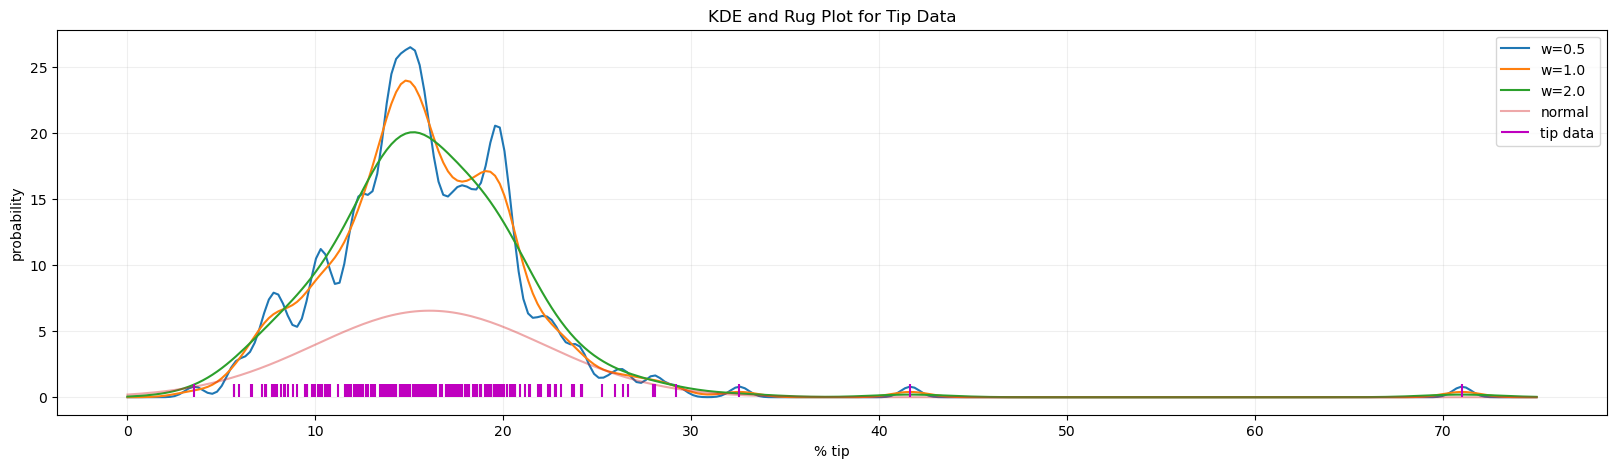

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

df = sns.load_dataset("tips")
tip_perc = np.array(df["tip"]/df["total_bill"])*100


def my_kde(x_vals, tips, width):

  kde = np.zeros(len(x_vals))

  for tip in tips:

    kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

  return kde

x_vals = np.linspace(0,75, 300)

plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='normal')

# rug plot
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()

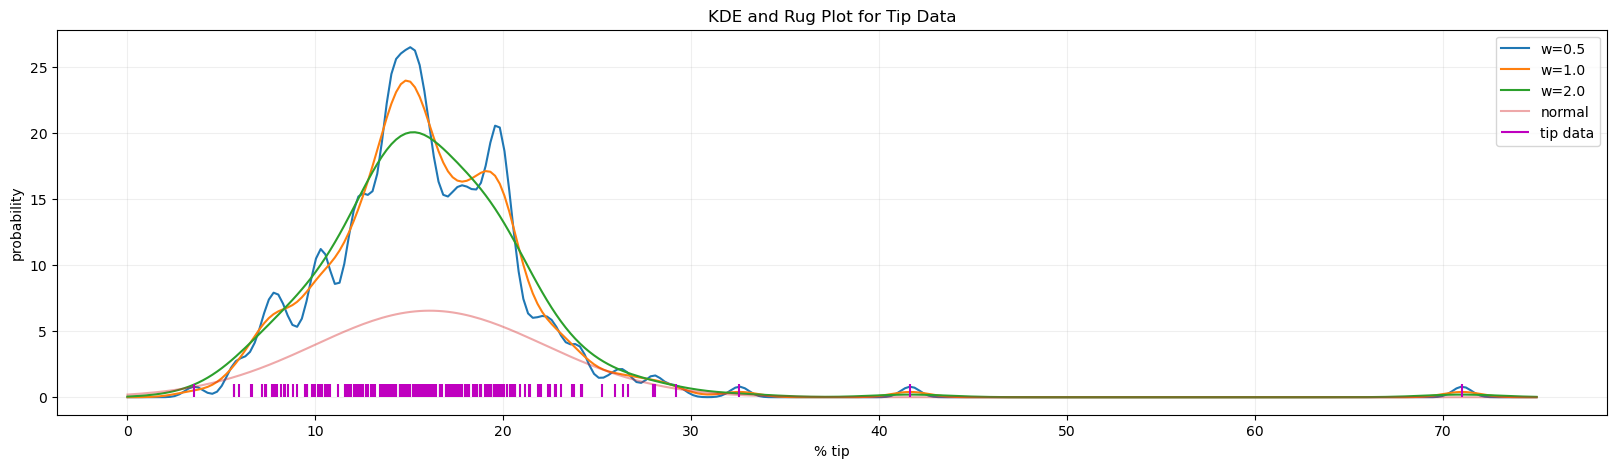

In [2]:
# pep 8 standard
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

df = sns.load_dataset("tips")
# finding percentage of tips and storing those in form of array
tip_perc = np.array(df["tip"]/df["total_bill"])*100


# function to find kde which take generated x values, percentage tips and width of kde
def my_kde(x_vals, tips, width):

    kde = np.zeros(len(x_vals))

    for tip in tips:

        kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

    return kde


x_vals = np.linspace(0, 75, 300)  # creating x values

# plots with different kde width
plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha=0.4, label='normal')

# rug plot with vertical lines
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

# plotting kde with different w and rug plot together
plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()



In [3]:
my_df=sns.load_dataset("tips");
my_df.head(7)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2

In [4]:
my_df2=my_df
my_df2['Tips_Percentage']=100*my_df2['tip']/my_df2['total_bill']
my_df2.head(7)

total_bill   tip     sex smoker  day    time  size  Tips_Percentage
0       16.99  1.01  Female     No  Sun  Dinner     2         5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3        16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3        16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2        13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4        14.680765
5       25.29  4.71    Male     No  Sun  Dinner     4        18.623962
6        8.77  2.00    Male     No  Sun  Dinner     2        22.805017

Text(0.5, 0, '% Tip')

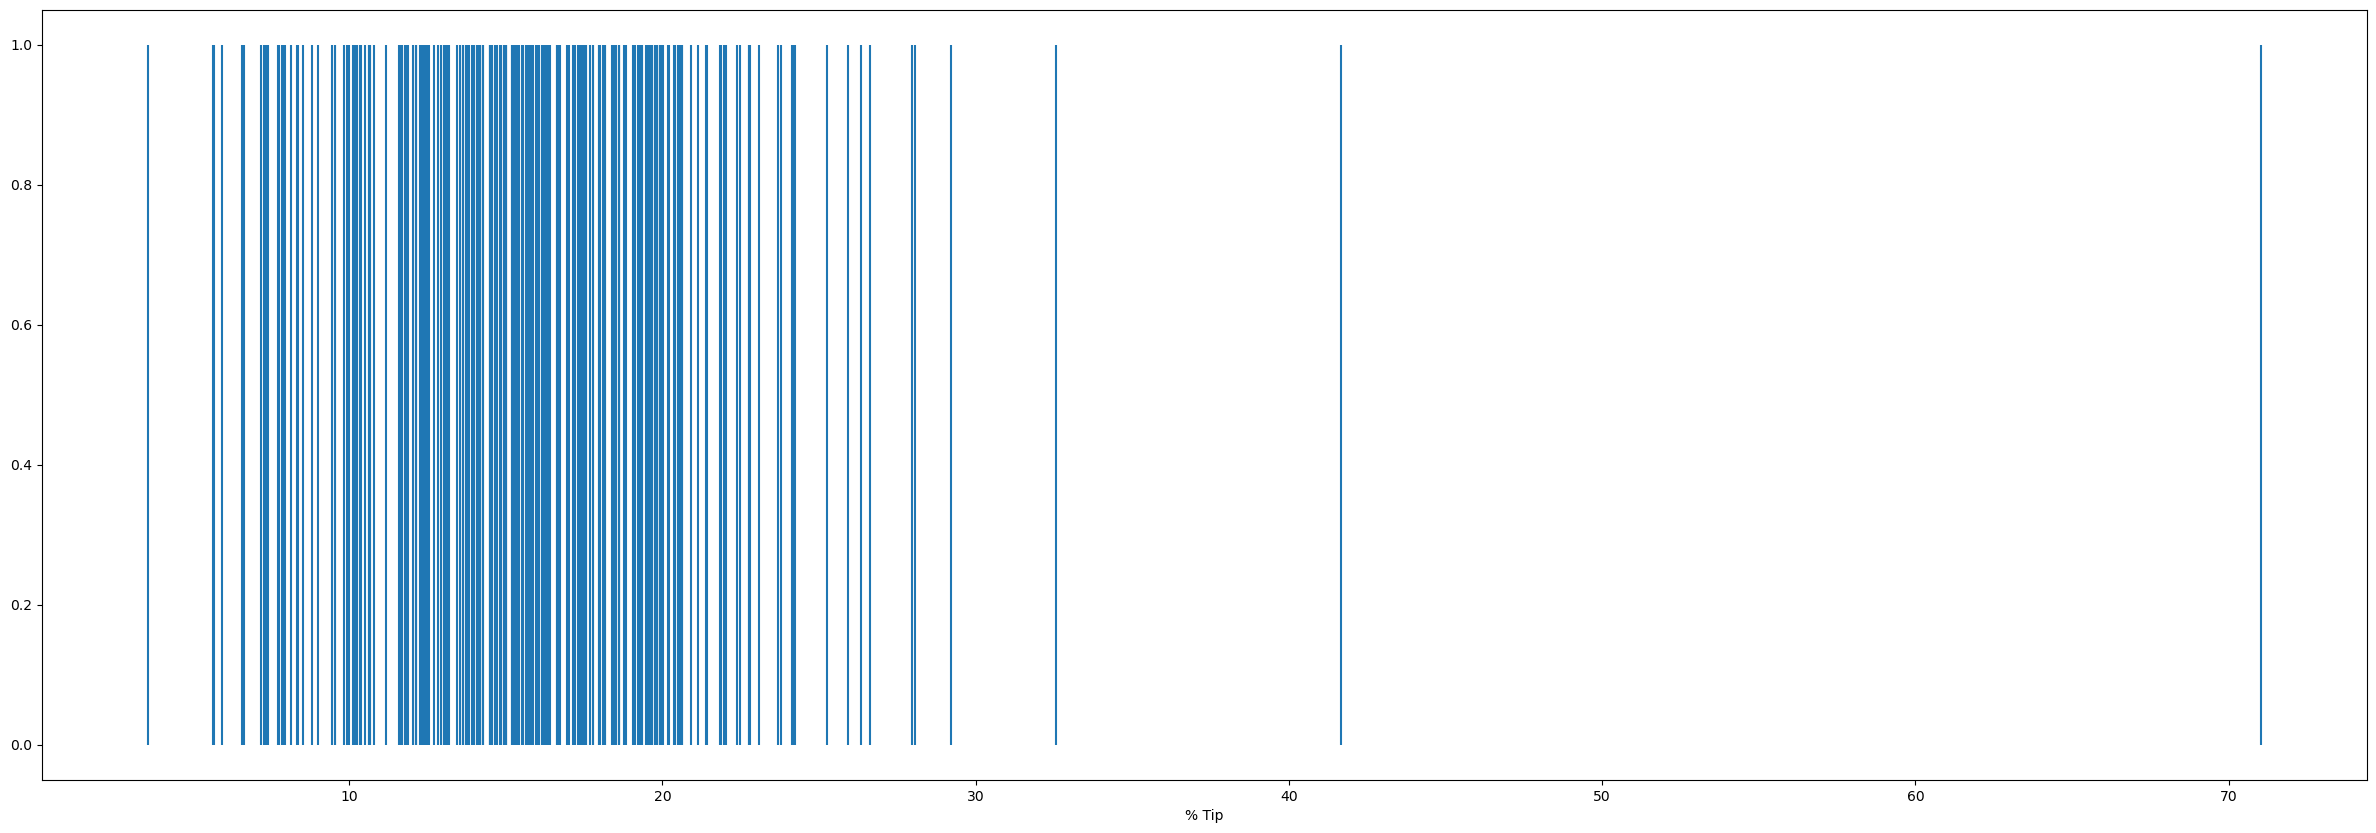

In [5]:
percentagetips_array=np.array(my_df2['Tips_Percentage'])
plt.figure(figsize=(30,10))
plt.vlines(percentagetips_array,0,1)
plt.xlabel("% Tip")

# Ans 
 👉Because data is not dispersed symmetrically along any line, tips are not normally distributed. Here, mean, mode and median are not identical.

In [6]:
def my_kde2(x_values,per_tip,kernel_width):
    kde2=np.zeros(len(x_values))
    for i in per_tip:
        kde2 += np.exp(-(x_values - i)**2/(2*kernel_width**2))/(np.sqrt(2*np.pi)*kernel_width)
    return kde2


Showing graphs seperately


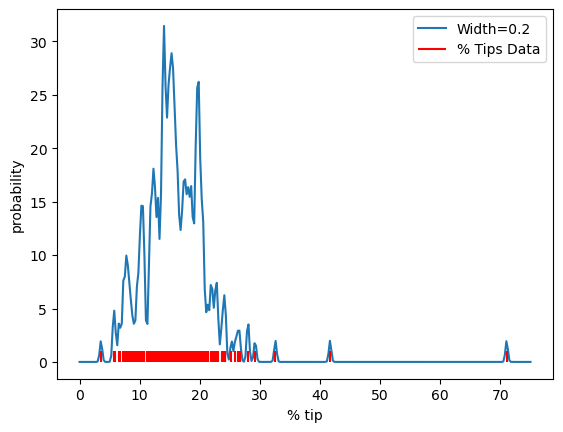

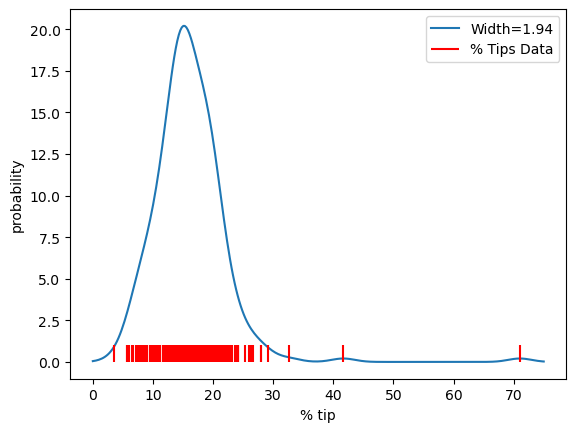

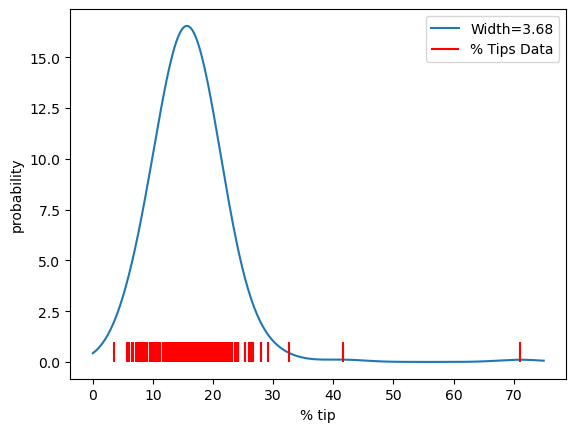

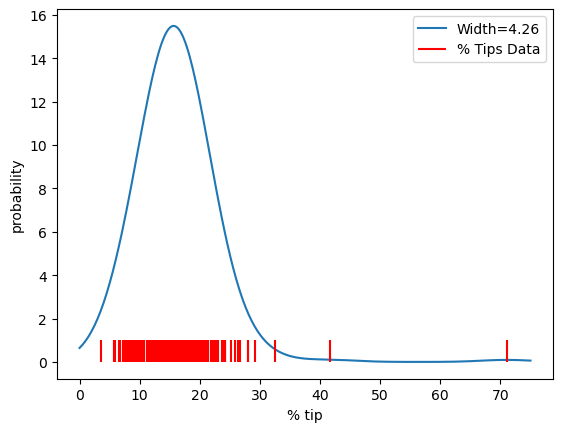

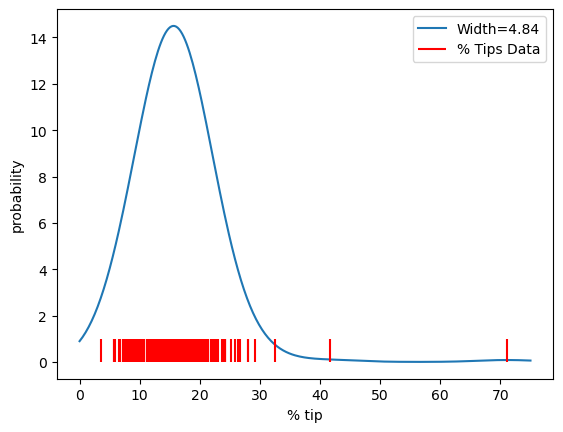

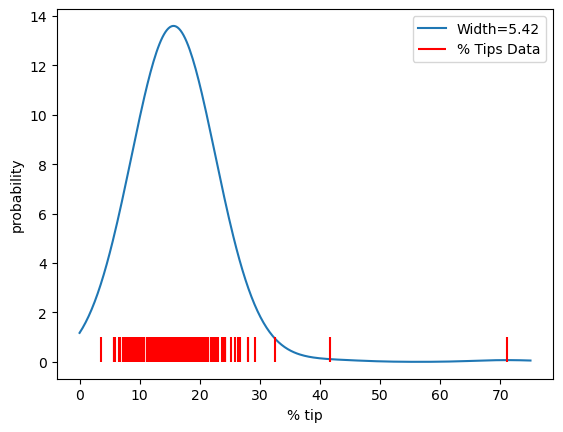

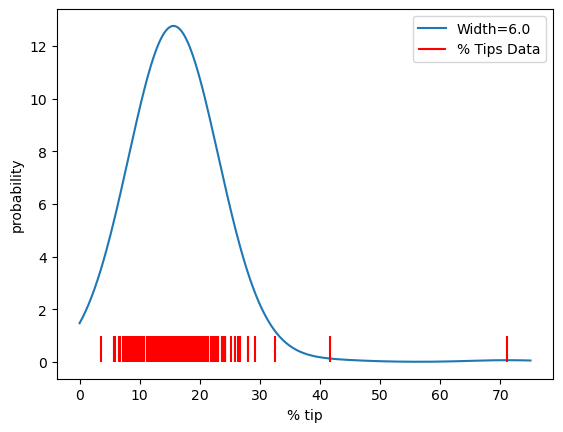

In [7]:
print("Showing graphs seperately")
x_values = np.linspace(0,75, 300)
w=np.linspace(0.2,6,11)
for i in w:
    writing=f"Width={round(i,4)}"
    plt.plot(x_values, my_kde2(x_values,percentagetips_array,i), label=writing)
    plt.vlines(percentagetips_array,0,1,'r',label="% Tips Data")
    plt.xlabel("% tip")
    plt.ylabel("probability")
    plt.legend()
    plt.show()
    

    
    


In [8]:
print("Showing graphs together")
x_values = np.linspace(0,75, 300)
w=np.linspace(0.2,6,11)
for i in w:
    writing=f"Width={round(i,4)}"
    plt.plot(x_values, my_kde2(x_values,percentagetips_array,i), label=writing)
    plt.xlabel("% tip")
    plt.ylabel("probability")
    plt.legend()
    
plt.vlines(percentagetips_array,0,1,'r',label="% Tips Data")

Showing graphs together


# Ans 
 👉I think, width value w=6 is best because the kde looks smooth. In this case, there is not many peaks and valleys in the graph.

In [9]:
mean=np.mean(percentagetips_array)
print(f"Mean of percentage tips is {mean} %")
median=np.median(percentagetips_array)
print(f"Median of percentage tips is {median} %")

Mean of percentage tips is 16.08025817225047 %
Median of percentage tips is 15.476977125802577 %


In [10]:

plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='Normal Distribution')
plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()


In [11]:
plt.plot(x_values, my_kde2(x_values,percentagetips_array,6), label="KDE with Width=6")
plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()

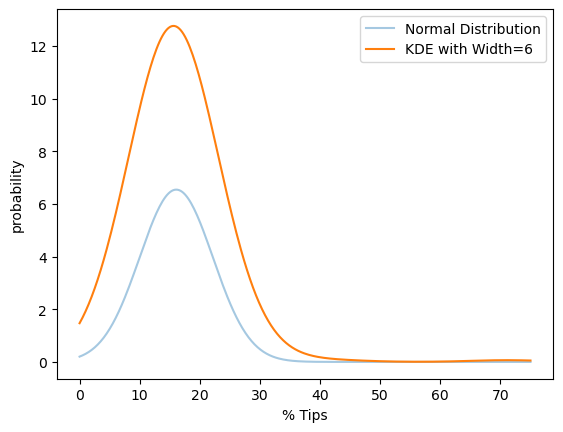

In [12]:
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='Normal Distribution')
plt.plot(x_values, my_kde2(x_values,percentagetips_array,6), label="KDE with Width=6")

plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()

# Ans 
 👉We can see shape is similar for kde and normal distribution but the size is not similar due to scaling and normalizing.

array([0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194

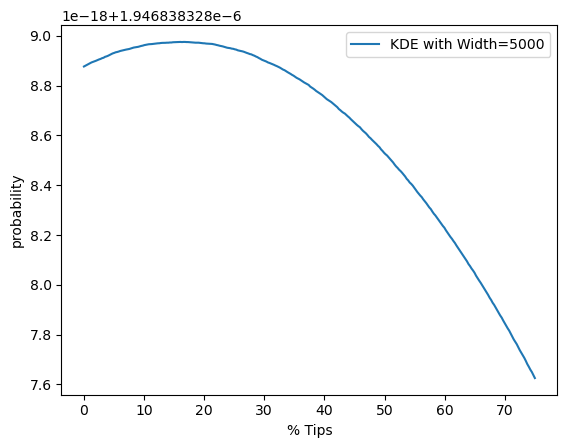

In [13]:

plt.plot(x_values, my_kde2(x_values,percentagetips_array,50000000), label="KDE with Width=5000")

plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()
my_kde2(x_values,percentagetips_array,50000)


# Ans 
 👉By looking at the values when width is very high we can see that for all the percentage of tips probability is almost same. The difference is very low between them. The data is oversmooth and we cannot extract any useful information out of it.

# Ans 
 👉Anyway the distribution is not symmetric. So, it is not like normal distribution.
 Choice of w will smooth the graph. As w goes up, graph becomes more smooth but it never gets symmetric.The shape of this does     not look like symmetric bell shape in any case. If w does up it looks like bell shape but it is not symmetric.
 There are outliers. Especially, we can see a outlier at the top percentage values. 

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### <font color=#839383>_choosing a topic for your project_</font>

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project.

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story.

Last week you examined several datasets that might be useful for your project. For this HW problem, you can use what you did last week; or, this is the time to choose different datasets if you didn't find last week's interesting or useful. After this week, you should decide on a dataset and stick with it at least through the midterm project.


✍🏻 In a markdown cell below, answer these questions:
* from a set of at least three datasets, discuss what they reveal to you,
* what is interesting about these datasets from a science point of view?,
* what is interesting about these datasets from a _data_ science point of view?
* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,
* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

Based on these steps, which of the datasets is the more interesting to you for your project and why?

The goal is for you to decide on a topic and know that it will be usable. Very often we have a project in mind for which there is no dataset available that allows us to do what we want. This is the time to ensure, through EDA on several datasets, that our project is realistic.

If you choose one of the more common and simple datasets, such as MPG, Penguin or Iris, you need to have a very compelling reason for your choice. There is already a lot known on the web about these datasets and there is very little new you can do with them. 

# Ans 
 👉 My dataset is about heart disease, lung cancer and brain stroke. These are severe problems human face in this century. From those 3 datsets, I can know the reason behind the problems. I can also know which causes are more responsible than others. I also want to know the common factors between these 3 problems. If the primary reasons and common factor can be determined, those issues can be solved or severity of those issues can be easily removed.
The interesting point is the correlation and other statistical results which can show us the major causes of those diseases and also we can know what are the minor causes so we can focus less on those minor issues and save our time. 
 👉 From science point of view, I can do many things with my data. Those are-
 a. Epidemiological Insights
 b. Risk Factor Analysis
 c. Treatment and Outcome Assessment
 d. Genetic Research
 e. Machine Learning and Predictive Models
 f. Health Disparities
 g. Longitudinal Studies
 h. Neuroimaging and Biomarker Research
 i. Pharmacological Research
 j. Telemedicine and Remote Monitoring
 
  👉I can see a lot of nominal, catagorical, numerical and other types of data here. We can do following type of data analysis from my dataset:
 a. Complexity of Data
 b. Feature Engineering
 c. Deep Learning for Data Analysis
 d. Natural Language Processing (NLP)
 e. Imbalanced Data
 f. Predictive Modeling
 g. Interpretability
 h. Evaluation Metrics
 i. Real-time Monitoring
 j. Collaboration with Healthcare Experts
 
 👉My web app works as following:
 1. It considers 3 default datasets.
 2. You can select any one of the datasets from those 3 default dataset.
 3. You can also upload your csv dataset if you do not want to do data analysis with those 3 default datasets.
 4. You can select x axis variable, y axis variable and hue parameter from so many columns.
 5. You can also work with reduced dataset where you can select less number of columns than the original dataset.
 6. You can plot different things there.
 👉 They can get many things out of my web site. 
 1. They can select their own dataset or they can select one among those 3 different datasets.
 2. They can see all the statistics.
 3. They can select their own dataset.
 4. They can work with reduced number of features.
 5. They can see many graphs.
 👉 My repo link- https://github.com/binsarda/CMSE-830-HW-4
 👉 My app link-https://cmse-830-hw-4-ep8zmyumsnccwe3mpslyts.streamlit.app/
 👉 Brain stroke dataset is more interesting to me. Because I came to know that many people died of brain stroke. It is one of the reasons for so many deaths. People of all age can be a victim of this. Almost no people under a certain age die because of other 2 reasons. But for this, many people of early age die. 

____
![project](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)
## Problem #3 (5pts)

### <font color=#839383>more on Streamlit</font>

From the previous problem, choose your favorite dataset - the one you are liking to use for the midterm project. Build that into a very simple Streamlit app.

Do that by watching this video. Follow the video and build a web app as you are watching, but using the dataset you chose from the previous problem.

The goal is that you start to connect the narrative associated with the data to what the purpose of the web app might be.

If you are having any trouble with deploying Streamlit, please contact us on Slack.


In [14]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Um12_OlGgw?si=pYR7WmeChe7Xxpq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


# Ans 
 👉 I updated the app and tried to follow most of the things from vieo posted above.
 👉 My repo link- https://github.com/binsarda/CMSE-830-HW-4
 👉 My app link-https://cmse-830-hw-4-ep8zmyumsnccwe3mpslyts.streamlit.app/
 👉 Please select the relevant options to see the graphs and images. If you do not click those options you cannot see the            plots. This is made to keep the page clear.

____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it?
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
4. define "missingness",
5. what are the three main types of missingness?
6. how is multiple imputation implemented?
7. what is mean substitution, and what can go wrong?
8. what is regression substitution, and what does it miss?
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR


# Ans 
1. define "imputation" in your own words-

👉Imputation refers to a statistical method employed for managing absent data within a dataset. It encompasses the process of approximating or substituting missing data points with reasonable values derived from the available observed data.

2. what is "listwise deletion" and what are two potential problems with using it?

👉"Listwise deletion" is a data handling approach that involves the complete removal of any row within a dataset that contains missing values (NaN) in any of its columns. This method guarantees that only datasets with complete information are utilized for analysis. Nevertheless, two potential drawbacks associated with listwise deletion include:

a. Information Loss: Listwise deletion can result in the removal of valuable data, leading to a reduction in the dataset's overall size and potentially discarding meaningful patterns or insights.

b. Introduction of Bias: The removal of incomplete cases may introduce bias into the analysis, as the characteristics of the excluded cases may differ systematically from those included, potentially skewing the results.

3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?

👉"Pairwise deletion" exclusively eliminates missing values within a dataset, unlike "listwise deletion," which discards entire rows containing missing values.
When completing particular calculations or analysis, missing values are momentarily omitted or disregarded using the pairwise deletion strategy for managing missing data. For studies using variables with accessible data for that particular study, pairwise deletion keeps each observation in the dataset as opposed to deleting whole cases with missing data (listwise deletion) or imputes missing values.In essence, pairwise deletion accommodates the missing values by simply eliminating them from the appropriate procedures, while maximizing the use of the data that is already accessible for individual calculations. When missing data are not fully random or when you wish to minimize significant data loss while still doing various statistical analyses, it is frequently utilized in statistical software packages and can be helpful. 
Nevertheless, this approach can introduce inconsistencies and decrease sample sizes in subsequent analyses, which may potentially impact the reliability and validity of the results.

4. define "missingness"

👉"Missingness" is a term that describes the pattern or manner in which data values are absent or unavailable within a dataset.

5. what are the three main types of missingness?

👉The three primary types of missingness in data are:

a. Missing Completely at Random (MCAR): In MCAR, the missingness of data points occurs randomly, and it is unrelated to any observed or unobserved variables. This means that the probability of data being missing is the same for all data points.

b. Missing at Random (MAR): In MAR, the missingness of data depends on observed variables within the dataset but is not directly related to the missing values themselves. In other words, once you consider the observed data, there is no systematic pattern to the missing data.

c. Missing Not at Random (MNAR): In MNAR, the missingness of data is related to the missing values themselves, which are often driven by unobserved or unmeasured variables. This type of missingness can introduce bias into analyses because the reasons for missing data are directly linked to the values that are missing.

Understanding these three types of missingness is essential for properly handling missing data in statistical analyses and making appropriate imputation or modeling decisions.

6. how is multiple imputation implemented?
👉Multiple imputation is a statistical technique that entails generating multiple sets of plausible imputed datasets, each with a distinct set of imputed values for missing data. These imputed datasets are subsequently analyzed individually, and their outcomes are aggregated using predefined rules, yielding a more precise and dependable estimate of the missing values along with an assessment of their associated uncertainty. This approach is particularly valuable in handling missing data as it acknowledges the inherent uncertainty in imputation and provides a more robust basis for statistical inferences.

7. what is mean substitution, and what can go wrong?
👉Mean substitution is a method of handling missing data in a dataset by substituting the missing values with the mean of the available values for that particular variable. Nevertheless, this approach can introduce bias and lead to an underestimation of data variability because it does not consider the potential relationship between missingness and other variables within the dataset.

8. what is regression substitution, and what does it miss?
👉Regression substitution is a technique for dealing with missing data where the missing values are estimated by predicting them using a regression model based on other available variables. However, this method may not capture nonlinear relationships or interactions that are not accounted for by the selected regression model, potentially leading to inaccurate imputations.

9. what problem does stochastic regression solve?
👉Stochastic regression is a method that tackles the issue of underestimating the variability linked to imputed values by integrating variance estimation and introducing randomness to the imputations. This approach results in more realistic and adaptable imputed values, helping to better represent the uncertainty associated with missing data imputation.

10. rank from best to worst: MAR, MCAR, MNAR
👉When ranking missingness types from best to worst in terms of handling missing data, it generally goes as follows:

a. MCAR (Missing Completely at Random): MCAR is considered the most favorable missingness type because it implies that the missing data occurs entirely by chance and is unrelated to any observed or unobserved variables. It often leads to unbiased estimates when using appropriate imputation methods.

b. MAR (Missing at Random): MAR is the next best scenario. In MAR, the missingness is related to observed variables but not directly to the missing values themselves. Although it requires careful handling, MAR can still be handled effectively with appropriate statistical techniques.

c.MNAR (Missing Not at Random): MNAR is generally the most challenging and undesirable type of missingness. In MNAR, the missing data is related to the missing values themselves, often due to unobserved or unmeasured factors. Handling MNAR data can be problematic because it may introduce bias into analyses, and imputation methods might not fully correct for this bias.

In summary, MCAR is the most preferred missingness type, followed by MAR, while MNAR poses the greatest challenges and potential for bias in data analysis. However, the choice of how to handle missing data should also consider the specific context of the analysis and the available data.


___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression).

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots.

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions".

✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot.

Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information.

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do.

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

In [15]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

In [16]:
# pep-8 standard
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 50)  # creating x values
y = np.linspace(0, 5, 40)  # creating y values
X, Y = np.meshgrid(x, y)  # creating 2d arrays of x and y

mx = 2
my = 3.5
wx = 0.6
wy = 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2 /
           (2*wy**2))  # calculating 2d gaussian

# creating 3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

In [17]:
#creating contour and image together
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

In [18]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

In [19]:
X

array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       ...,
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ]])

In [20]:
def gaussian1d(xvals,mu,w):
    z=np.exp( -((xvals-mu)**2)/(2*(w**2)) )/(w*np.sqrt(2*np.pi))
    return z
    
def gaussian2d(xvals,mux,wx,yvals,muy,wy):
    z=np.exp( -((xvals-mux)**2)/(2*(wx**2))  -((yvals-muy)**2)/(2*(wy**2))    )/(wx*wy*2*np.pi)
    return z

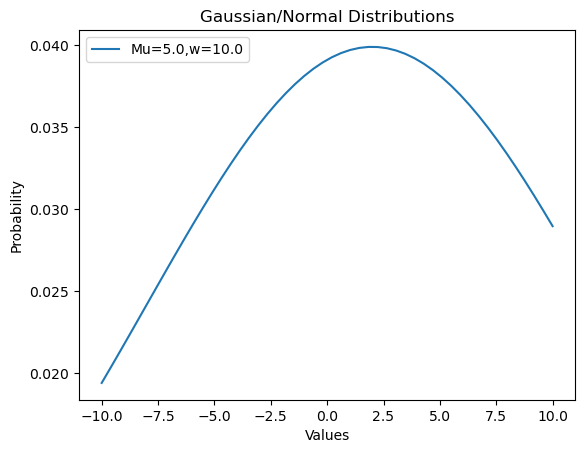

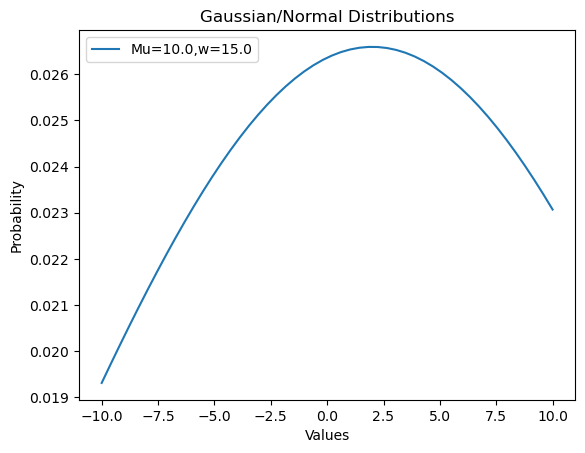

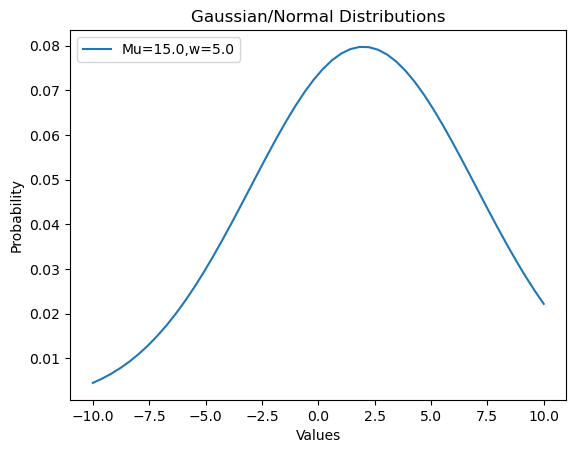

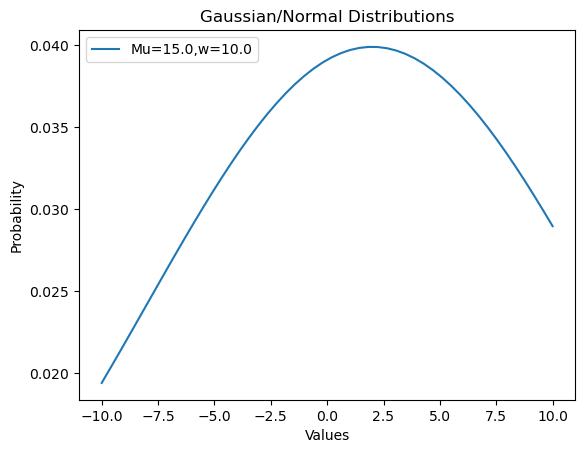

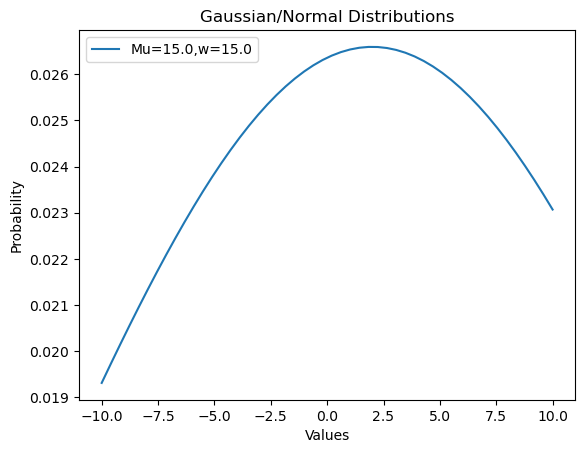

In [21]:
x1 = np.linspace(-10, 10, 50)


ran=np.linspace(5,15,3)

for muu in ran:
    for www in ran:
        m1=muu
        w1=www
        writing=f"Mu={m1},w={w1}"
        plt.plot(x1,gaussian1d(x1,mx,w1),label=writing)
        plt.title("Gaussian/Normal Distributions")
        plt.xlabel("Values")
        plt.ylabel("Probability")
        plt.legend()
        plt.show()
        
        



# Ans 
 👉 here mu is mean and w is standard deviation.

Surface plot


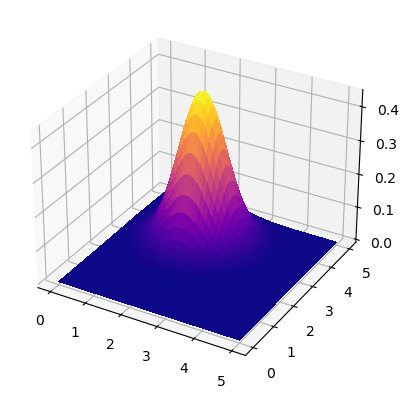

In [22]:
print("Surface plot")
x1 = np.linspace(0, 5, 50)
y1 = np.linspace(0, 5, 40)
X1, Y1 = np.meshgrid(x1, y1)

mx1 = 2
my1 = 3.5
wx1= 0.6
wy1= 0.6
#Z1=gaussian2d(X1,mx1,wx1,Y1,my1,wy1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, Y1, gaussian2d(X1,mx1,wx1,Y1,my1,wy1), cmap="plasma", linewidth=3, antialiased=False)

Only Contour plot


Text(0, 0.5, 'Y')

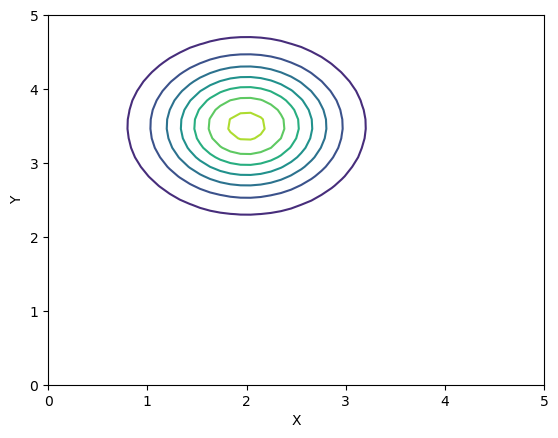

In [23]:
plt.contour(X1, Y1, gaussian2d(X1,mx1,wx1,Y1,my1,wy1), cmap='viridis')
print("Only Contour plot")
plt.xlabel("X")
plt.ylabel("Y")


Only Image plot


Text(0, 0.5, 'Y')

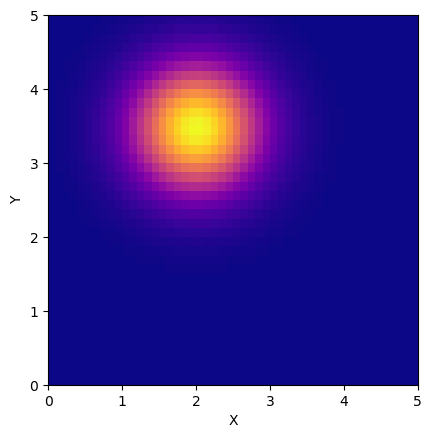

In [24]:
plt.imshow(gaussian2d(X1,mx1,wx1,Y1,my1,wy1), extent=[0, 5, 0, 5], origin='lower', cmap='plasma');
print("Only Image plot")
plt.xlabel("X")
plt.ylabel("Y")

Image and Contour Plot


Text(0, 0.5, 'Y')

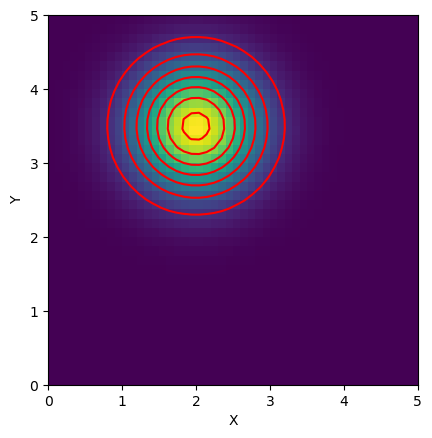

In [25]:
plt.contour(X1, Y1, gaussian2d(X1,mx1,wx1,Y1,my1,wy1), colors='red')
plt.imshow(gaussian2d(X1,mx1,wx1,Y1,my1,wy1), extent=[0, 5, 0, 5], origin='lower', cmap='viridis');
print("Image and Contour Plot")
plt.xlabel("X")
plt.ylabel("Y")

# Ans 
 👉MUx is mean for x variables. MUy is mean for y variable.
 Wx is standard deviation for x variables. Wy is standard deviation for y variable.

Surface plot
Surface and contour and image with different parameter values


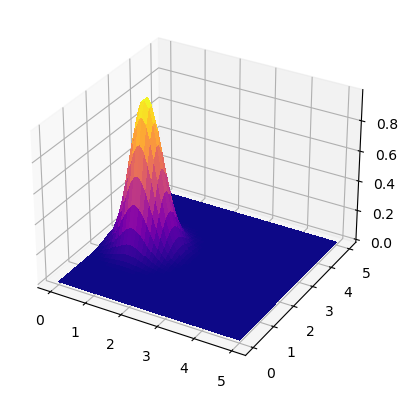

Mx=1 Wx=0.4 My=2.5 Wy=0.4 


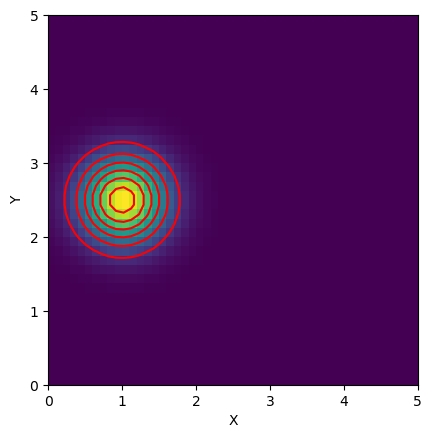

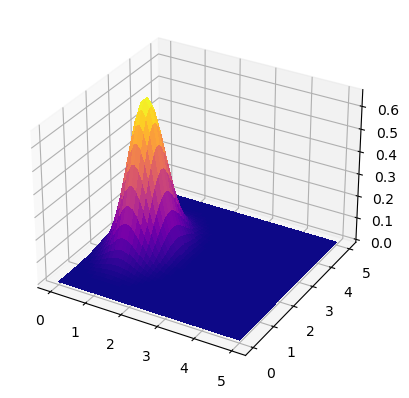

Mx=1 Wx=0.4 My=2.5 Wy=0.6 


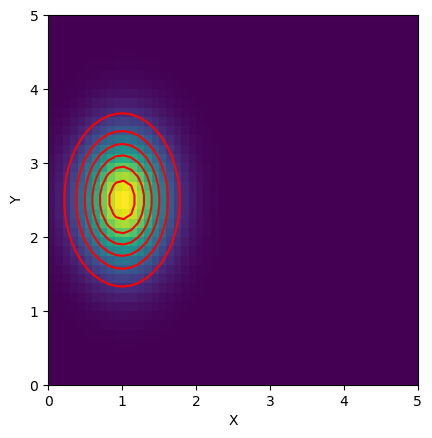

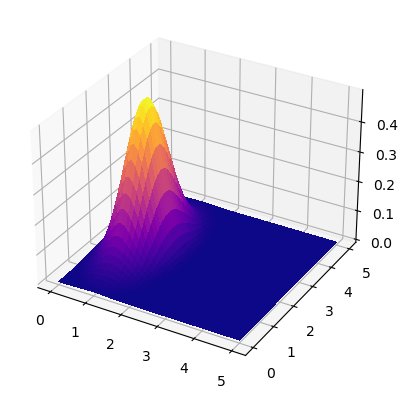

Mx=1 Wx=0.4 My=2.5 Wy=0.8 


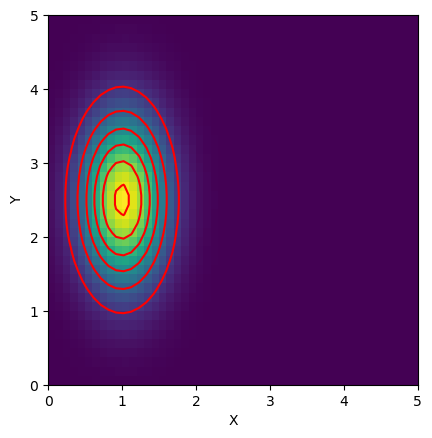

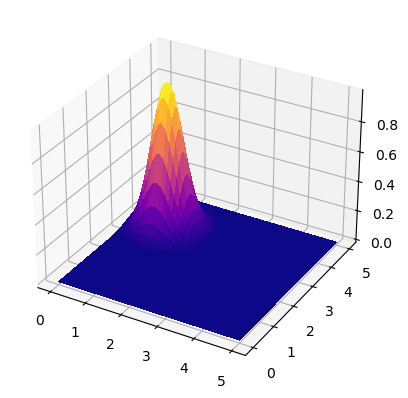

Mx=1 Wx=0.4 My=3.5 Wy=0.4 


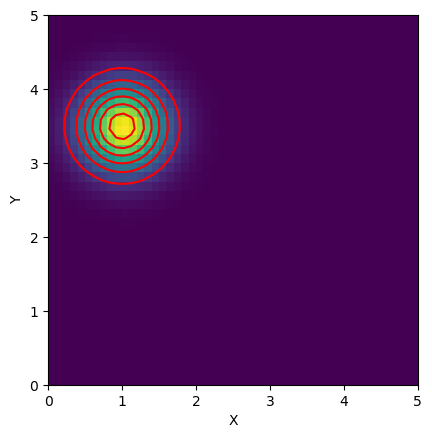

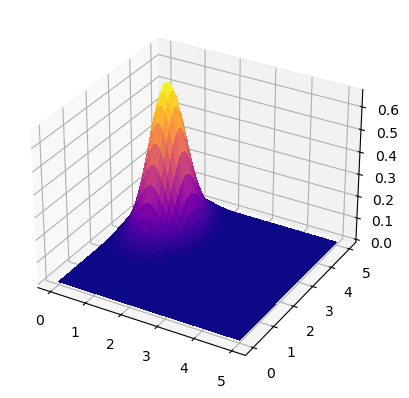

Mx=1 Wx=0.4 My=3.5 Wy=0.6 


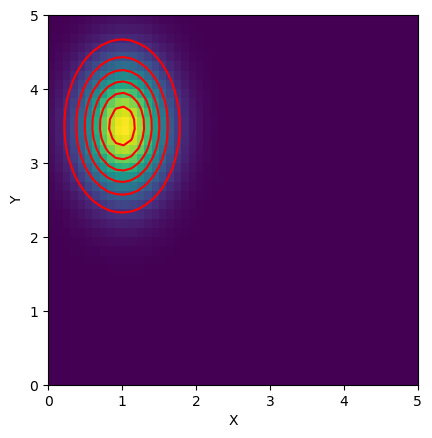

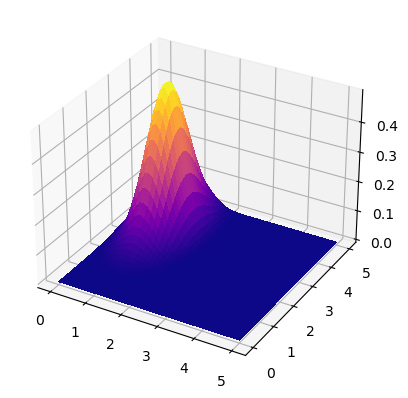

Mx=1 Wx=0.4 My=3.5 Wy=0.8 


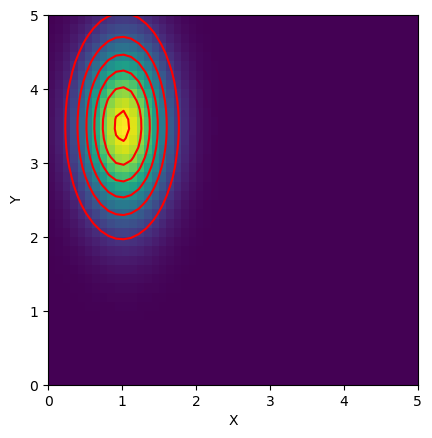

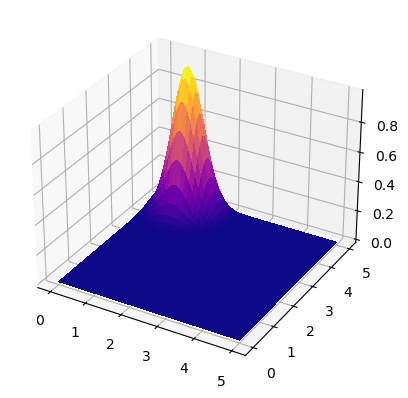

Mx=1 Wx=0.4 My=4.5 Wy=0.4 


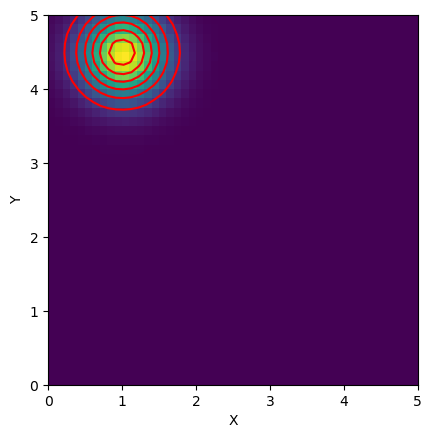

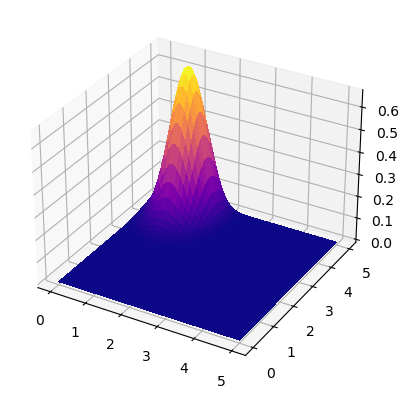

Mx=1 Wx=0.4 My=4.5 Wy=0.6 


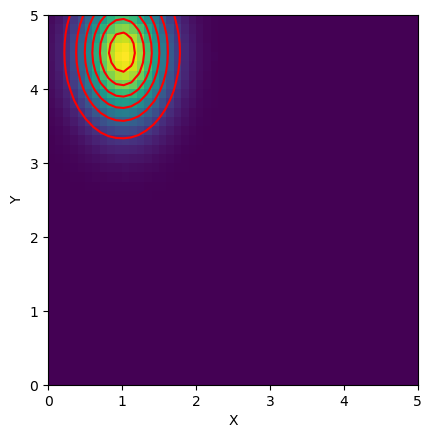

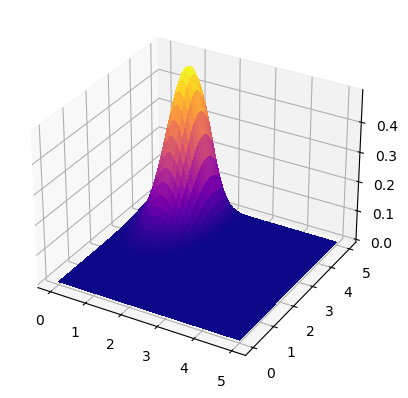

Mx=1 Wx=0.4 My=4.5 Wy=0.8 


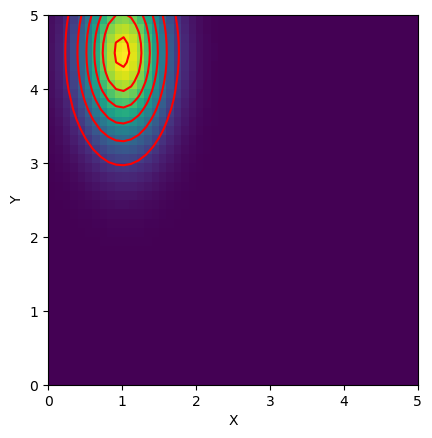

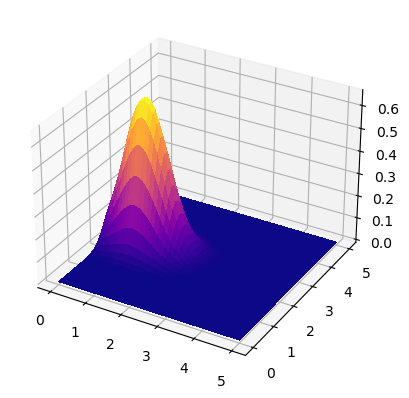

Mx=1 Wx=0.6 My=2.5 Wy=0.4 


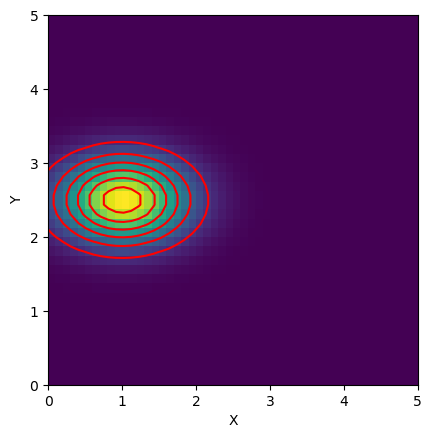

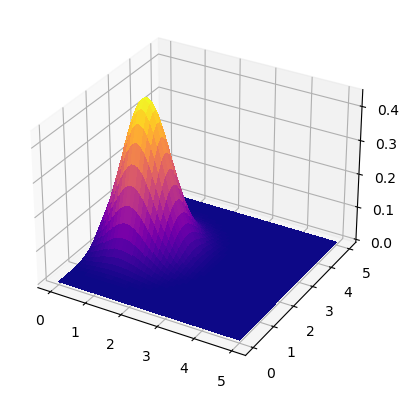

Mx=1 Wx=0.6 My=2.5 Wy=0.6 


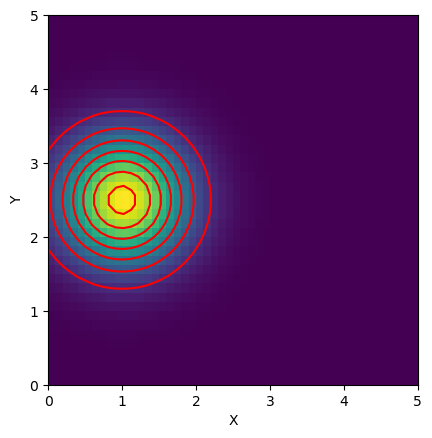

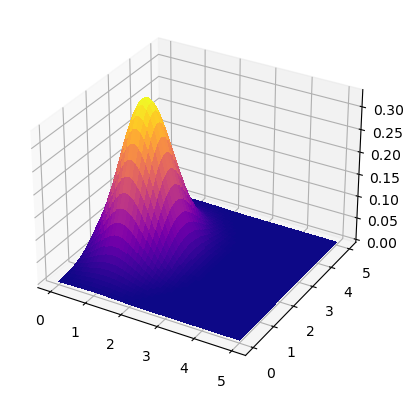

Mx=1 Wx=0.6 My=2.5 Wy=0.8 


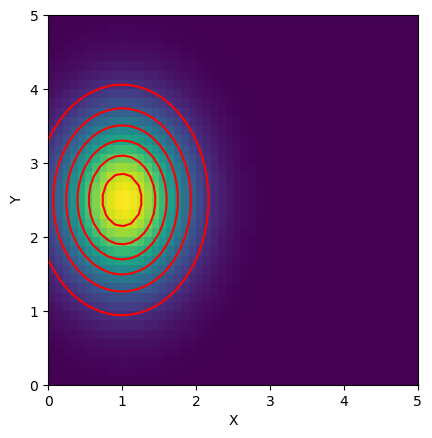

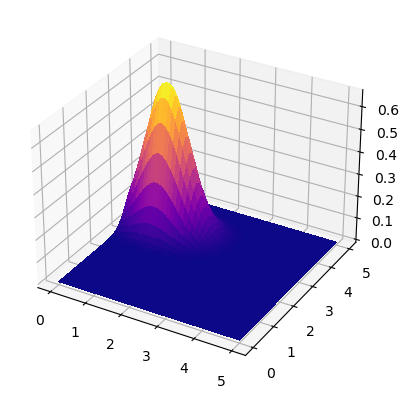

Mx=1 Wx=0.6 My=3.5 Wy=0.4 


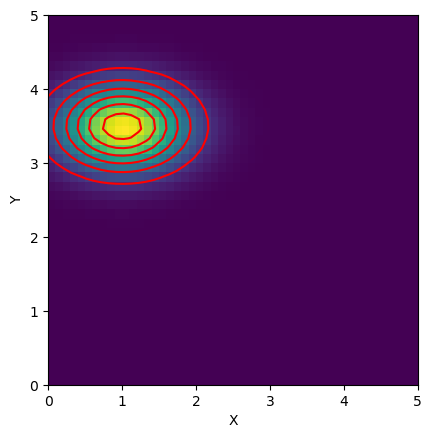

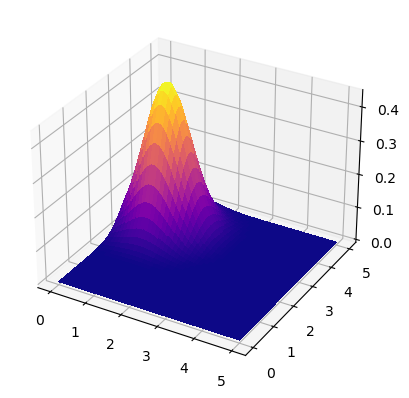

Mx=1 Wx=0.6 My=3.5 Wy=0.6 


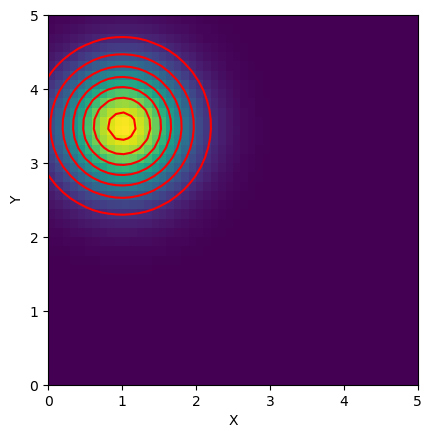

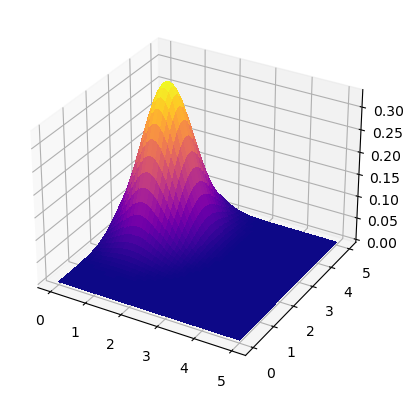

Mx=1 Wx=0.6 My=3.5 Wy=0.8 


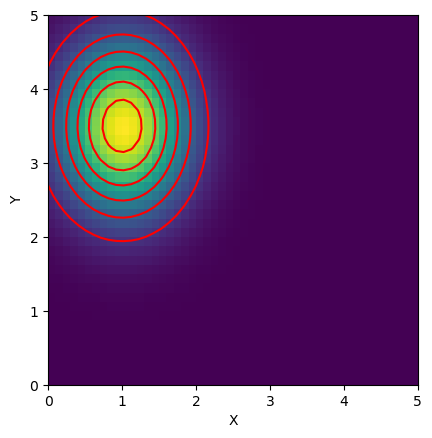

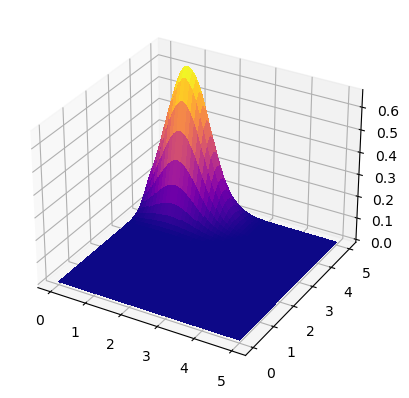

Mx=1 Wx=0.6 My=4.5 Wy=0.4 


Mx=1 Wx=0.6 My=4.5 Wy=0.6 


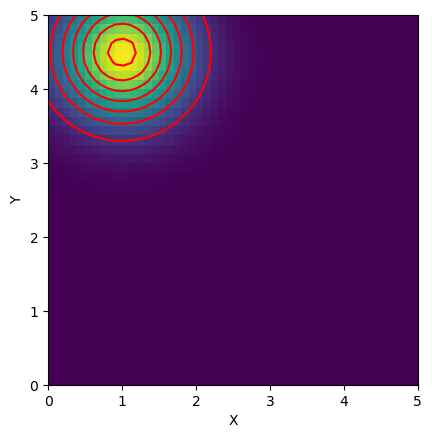

Mx=1 Wx=0.6 My=4.5 Wy=0.8 


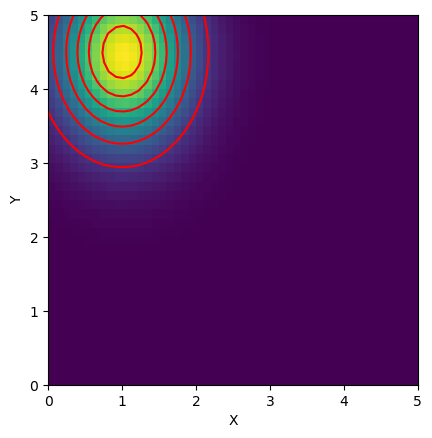

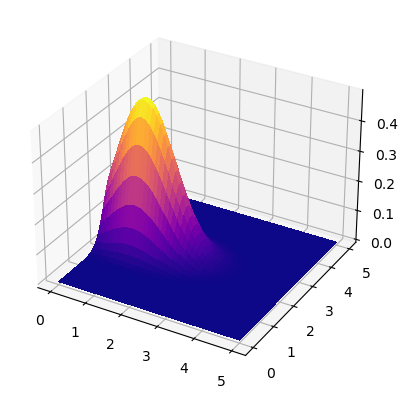

Mx=1 Wx=0.8 My=2.5 Wy=0.4 


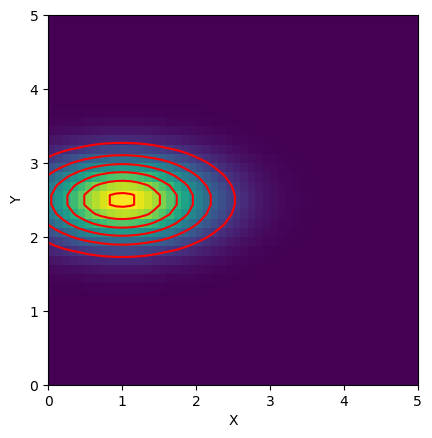

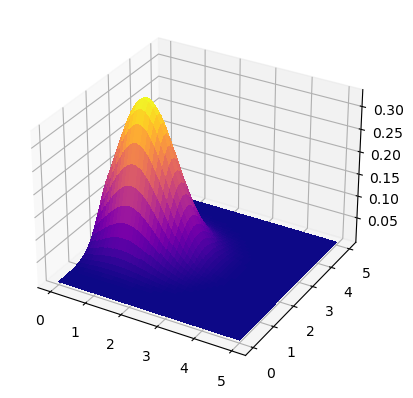

Mx=1 Wx=0.8 My=2.5 Wy=0.6 


Mx=1 Wx=0.8 My=2.5 Wy=0.8 


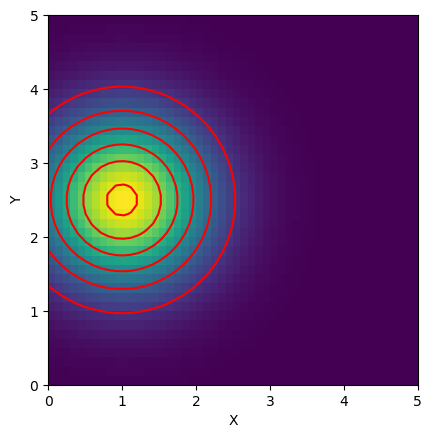

Mx=1 Wx=0.8 My=3.5 Wy=0.4 


Mx=1 Wx=0.8 My=3.5 Wy=0.6 


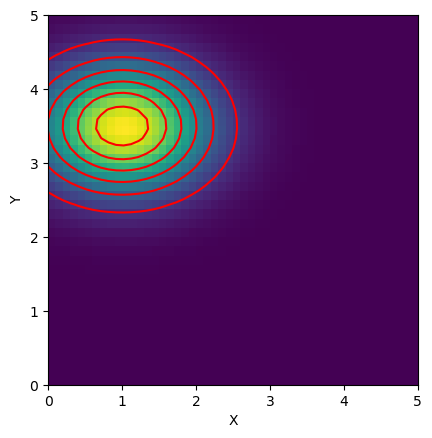

Mx=1 Wx=0.8 My=3.5 Wy=0.8 


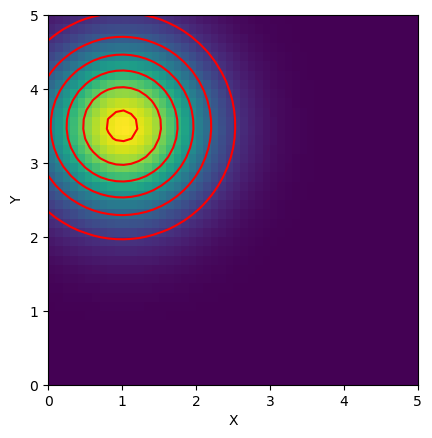

Mx=1 Wx=0.8 My=4.5 Wy=0.4 


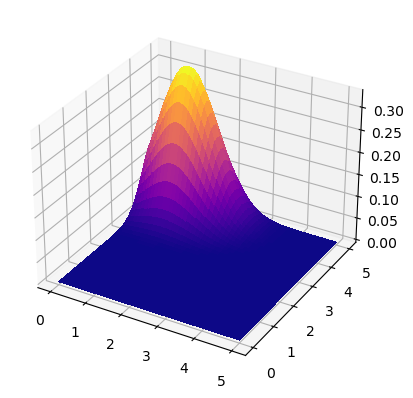

Mx=1 Wx=0.8 My=4.5 Wy=0.6 


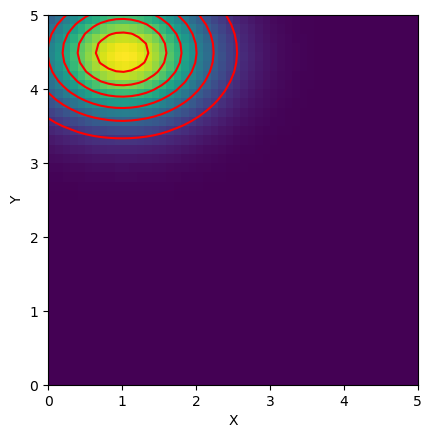

Mx=1 Wx=0.8 My=4.5 Wy=0.8 


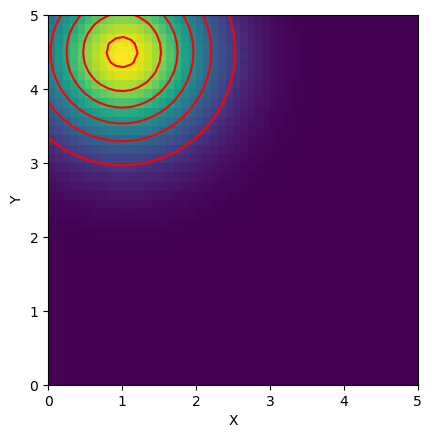

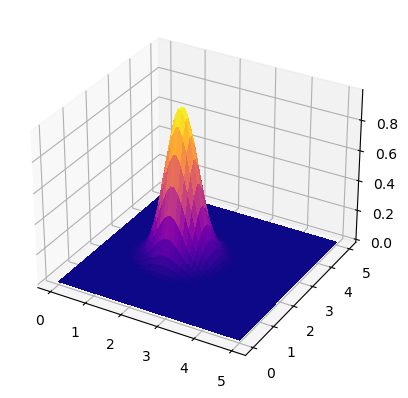

Mx=2 Wx=0.4 My=2.5 Wy=0.4 


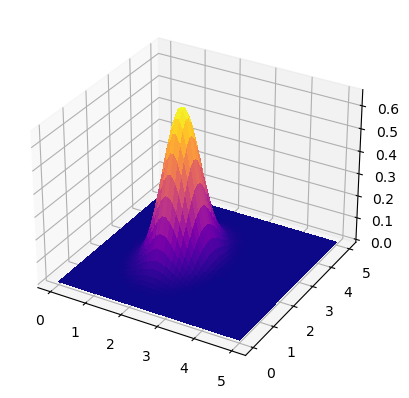

Mx=2 Wx=0.4 My=2.5 Wy=0.6 


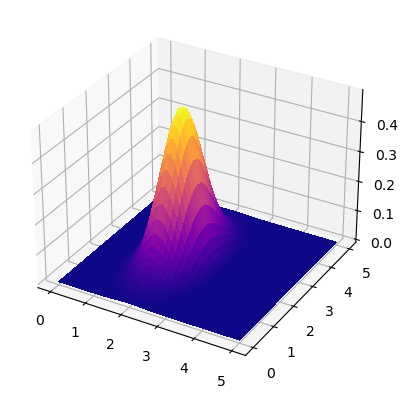

Mx=2 Wx=0.4 My=2.5 Wy=0.8 


Mx=2 Wx=0.4 My=3.5 Wy=0.4 


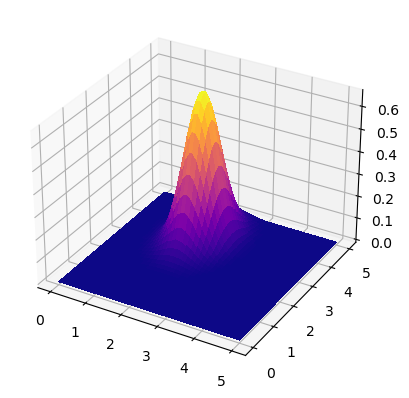

Mx=2 Wx=0.4 My=3.5 Wy=0.6 


Mx=2 Wx=0.4 My=3.5 Wy=0.8 


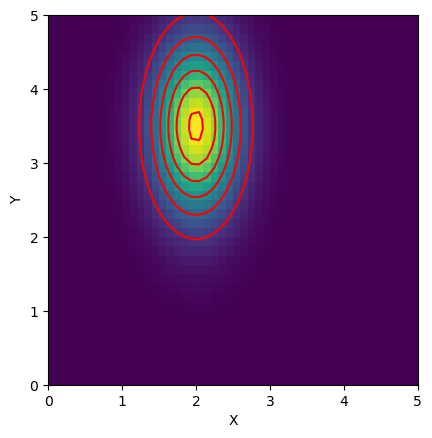

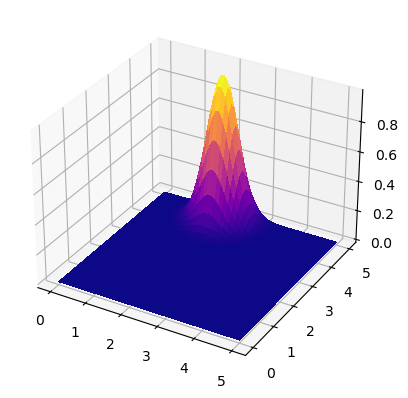

Mx=2 Wx=0.4 My=4.5 Wy=0.4 


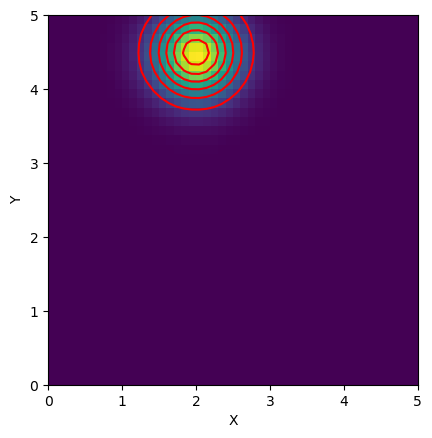

Mx=2 Wx=0.4 My=4.5 Wy=0.6 


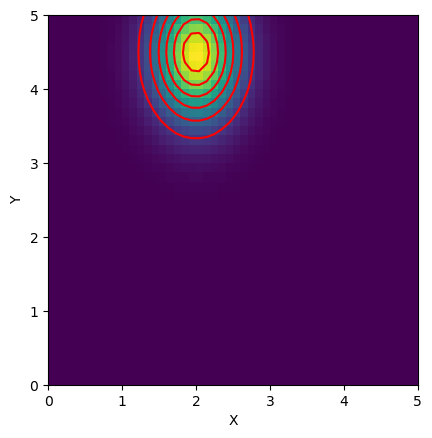

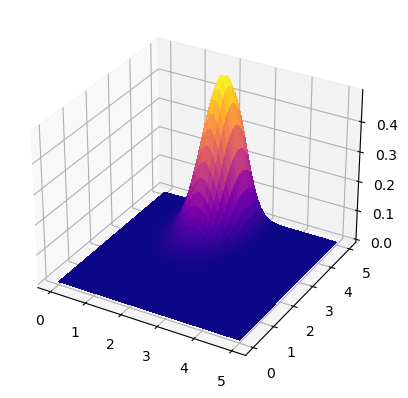

Mx=2 Wx=0.4 My=4.5 Wy=0.8 


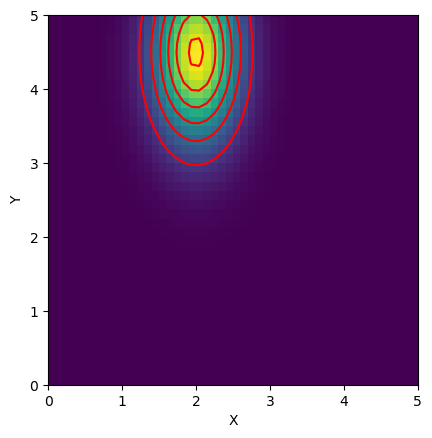

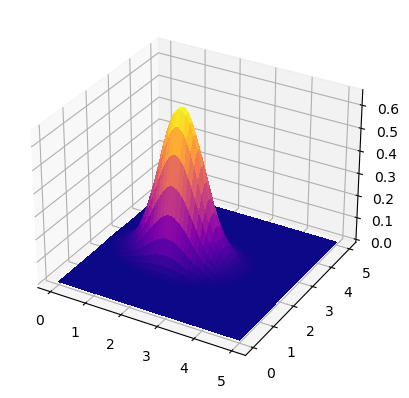

Mx=2 Wx=0.6 My=2.5 Wy=0.4 


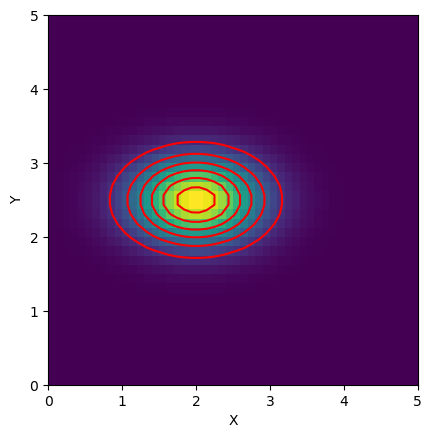

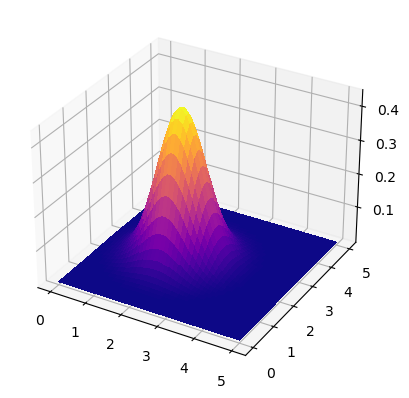

Mx=2 Wx=0.6 My=2.5 Wy=0.6 


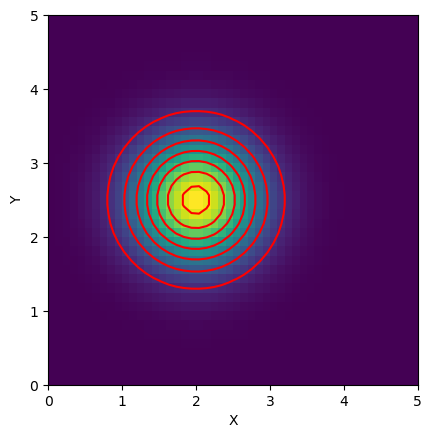

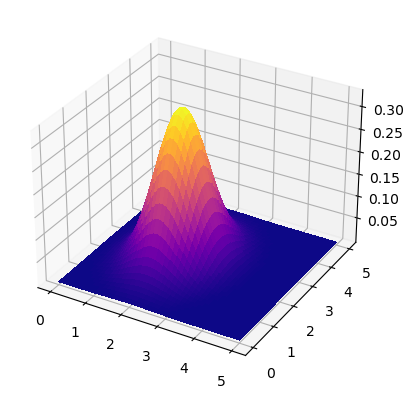

Mx=2 Wx=0.6 My=2.5 Wy=0.8 


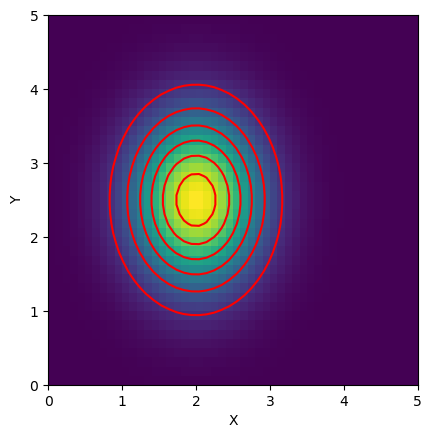

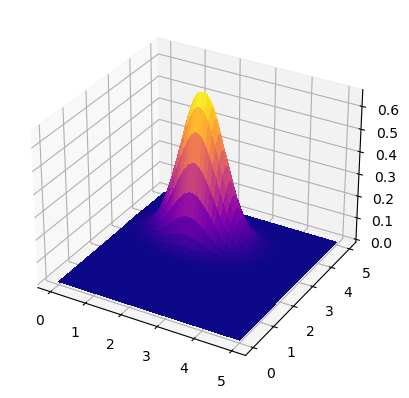

Mx=2 Wx=0.6 My=3.5 Wy=0.4 


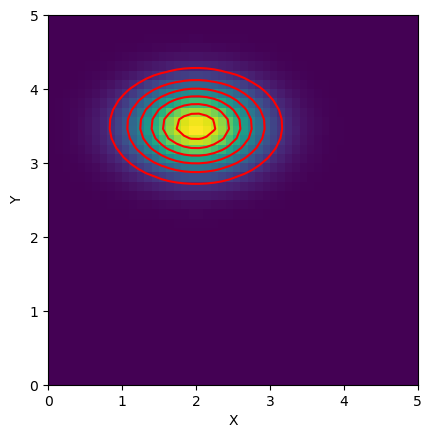

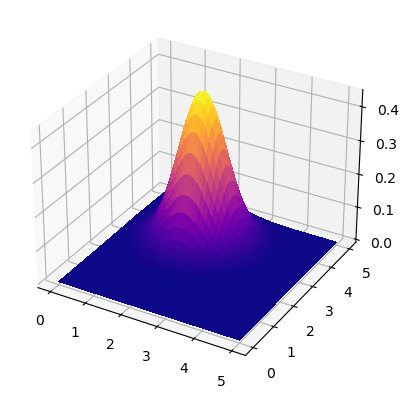

Mx=2 Wx=0.6 My=3.5 Wy=0.6 


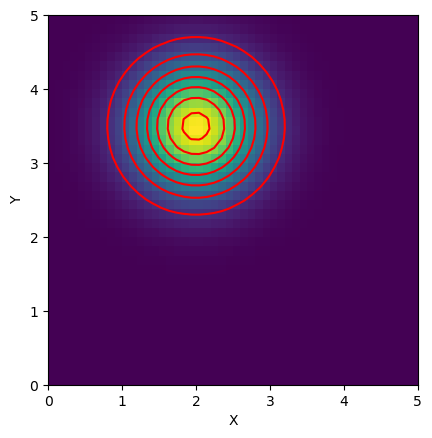

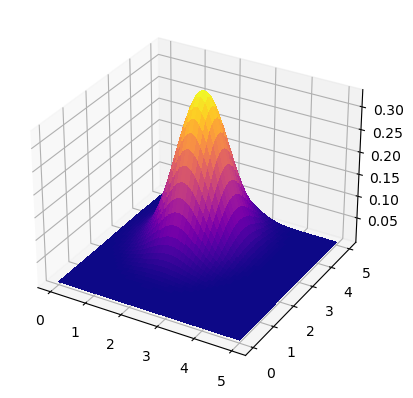

Mx=2 Wx=0.6 My=3.5 Wy=0.8 


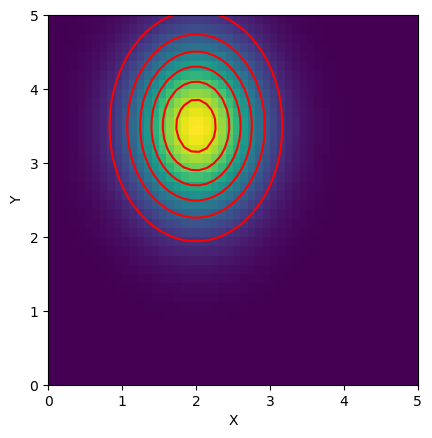

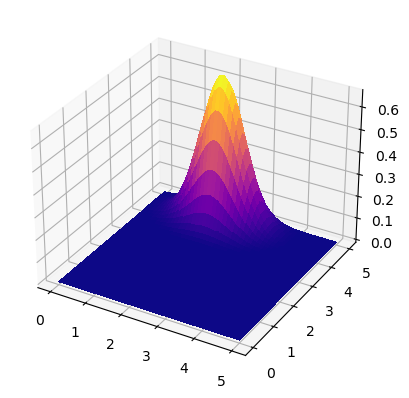

Mx=2 Wx=0.6 My=4.5 Wy=0.4 


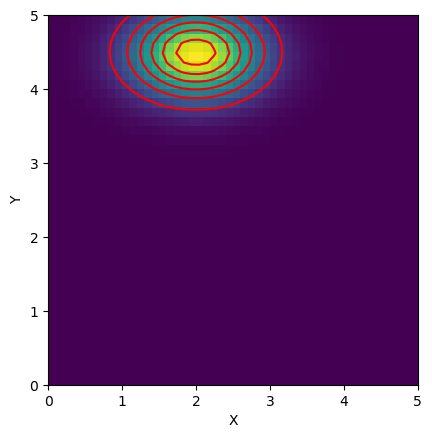

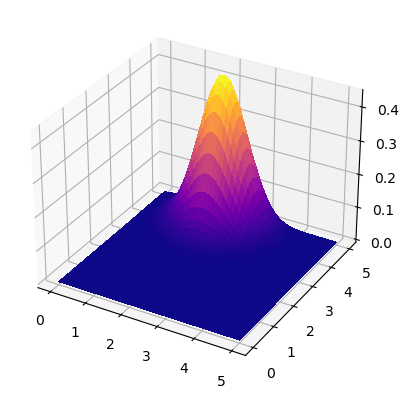

Mx=2 Wx=0.6 My=4.5 Wy=0.6 


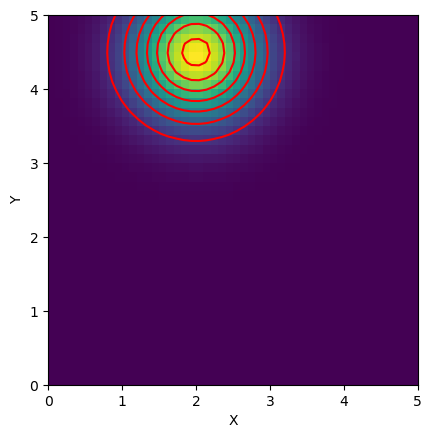

Mx=2 Wx=0.6 My=4.5 Wy=0.8 


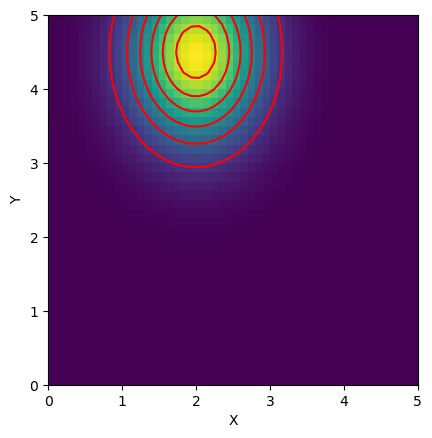

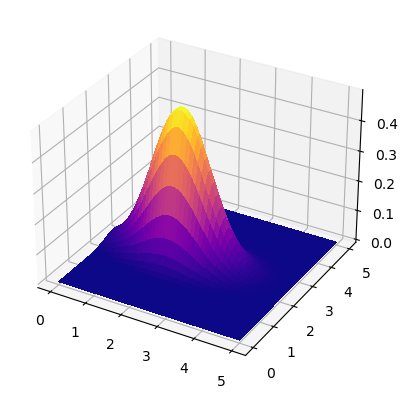

Mx=2 Wx=0.8 My=2.5 Wy=0.4 


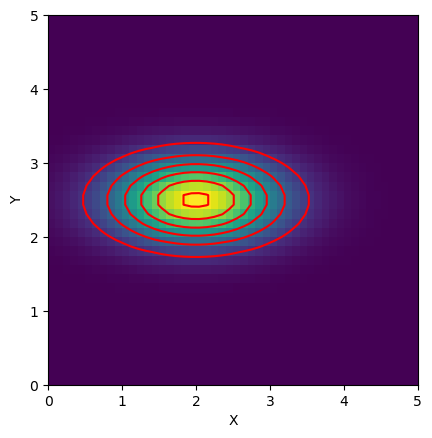

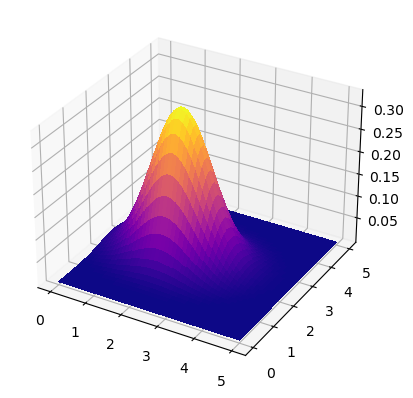

Mx=2 Wx=0.8 My=2.5 Wy=0.6 


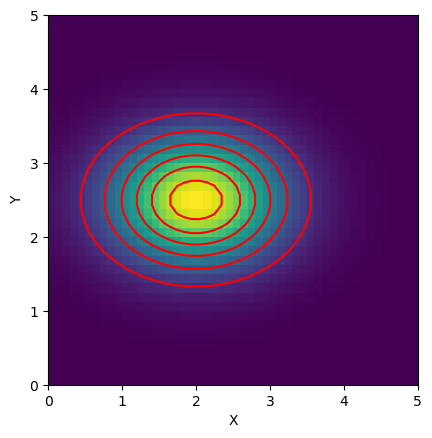

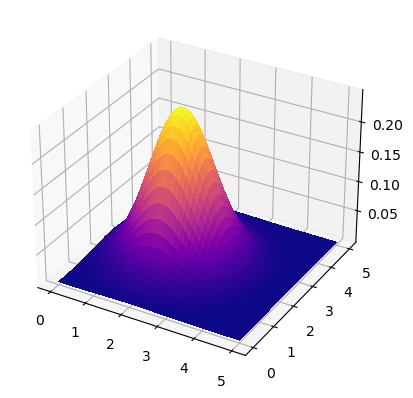

Mx=2 Wx=0.8 My=2.5 Wy=0.8 


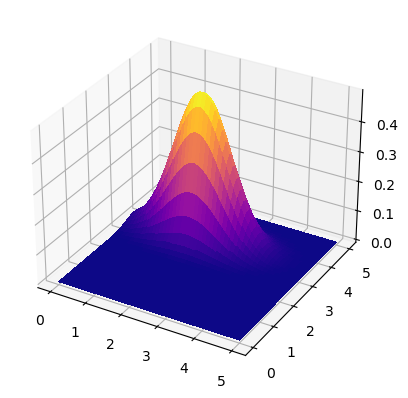

Mx=2 Wx=0.8 My=3.5 Wy=0.4 


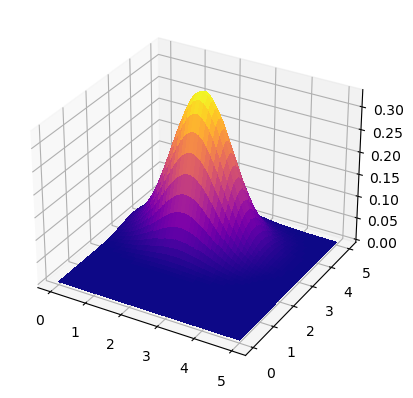

Mx=2 Wx=0.8 My=3.5 Wy=0.6 


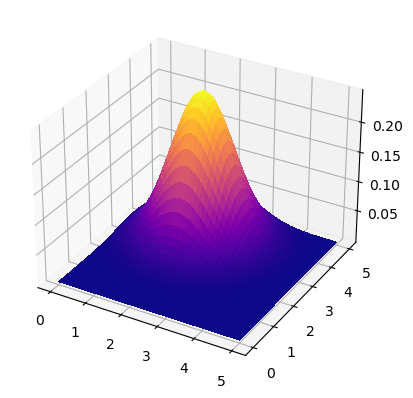

Mx=2 Wx=0.8 My=3.5 Wy=0.8 


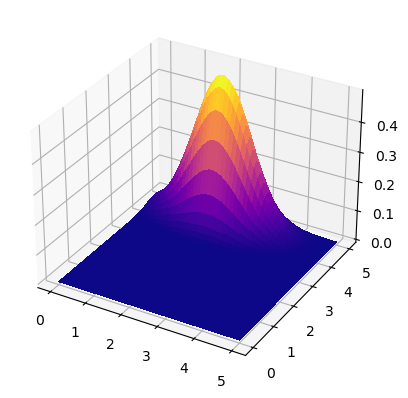

Mx=2 Wx=0.8 My=4.5 Wy=0.4 


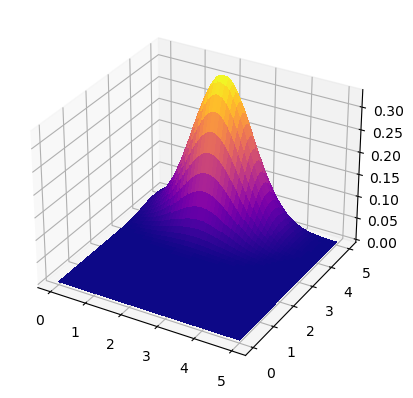

Mx=2 Wx=0.8 My=4.5 Wy=0.6 


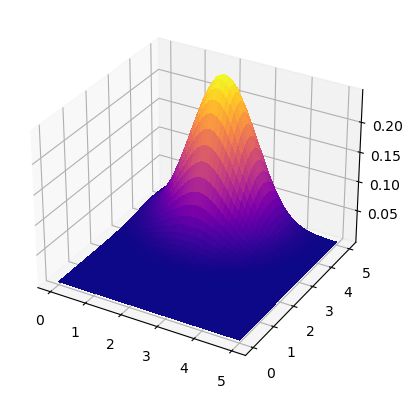

Mx=2 Wx=0.8 My=4.5 Wy=0.8 


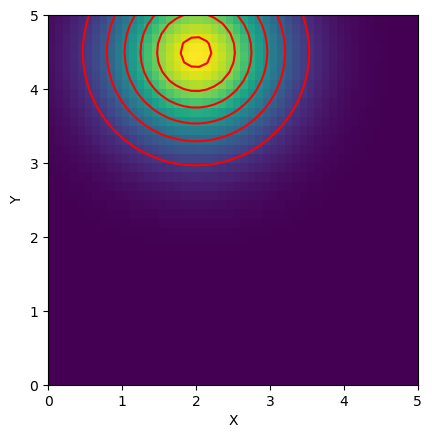

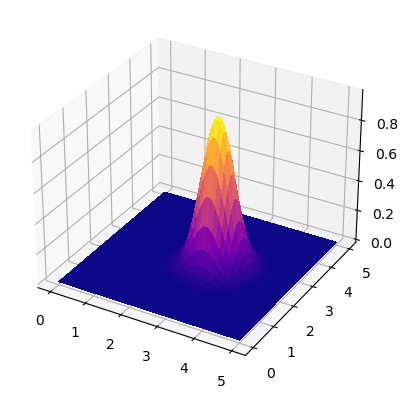

Mx=3 Wx=0.4 My=2.5 Wy=0.4 


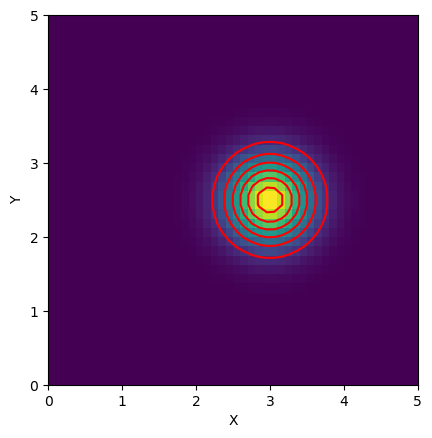

Mx=3 Wx=0.4 My=2.5 Wy=0.6 


Mx=3 Wx=0.4 My=2.5 Wy=0.8 


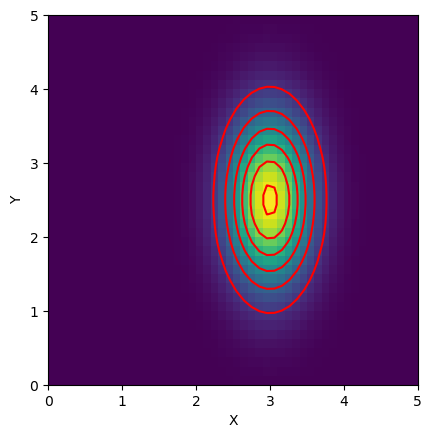

Mx=3 Wx=0.4 My=3.5 Wy=0.4 


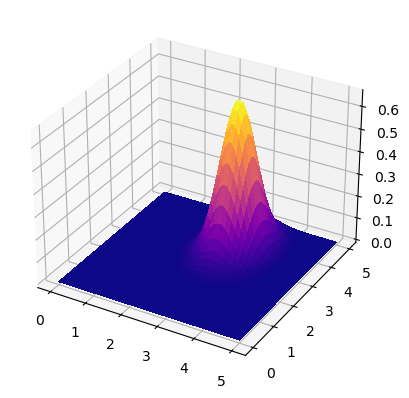

Mx=3 Wx=0.4 My=3.5 Wy=0.6 


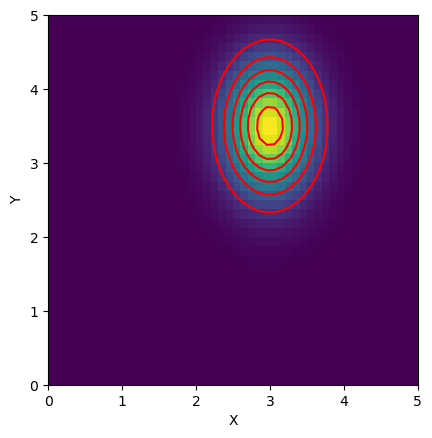

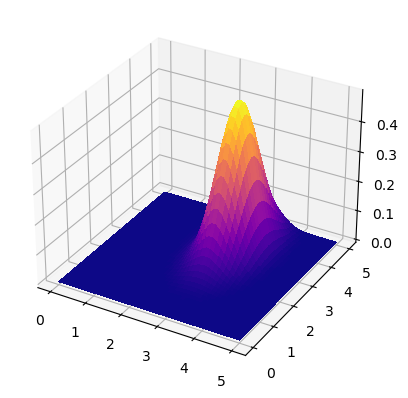

Mx=3 Wx=0.4 My=3.5 Wy=0.8 


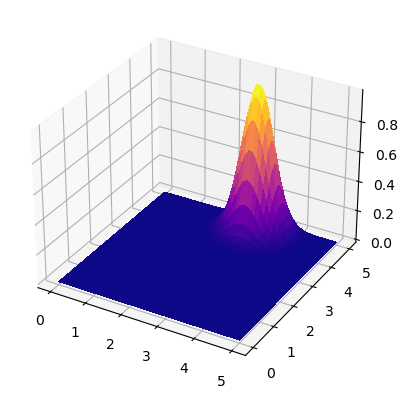

Mx=3 Wx=0.4 My=4.5 Wy=0.4 


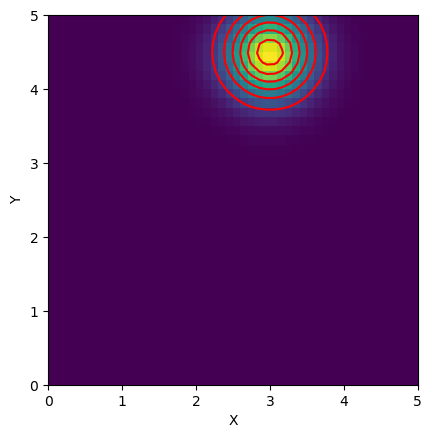

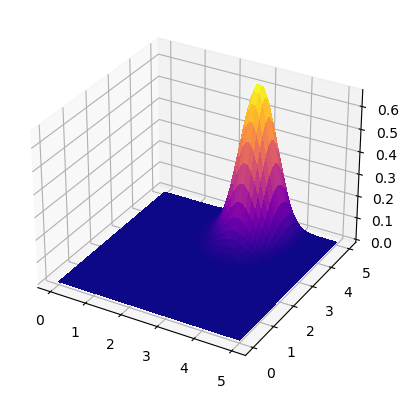

Mx=3 Wx=0.4 My=4.5 Wy=0.6 


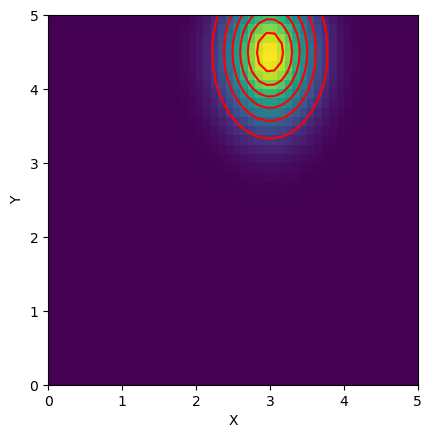

Mx=3 Wx=0.4 My=4.5 Wy=0.8 


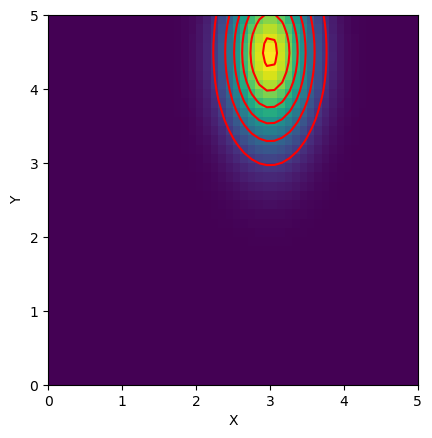

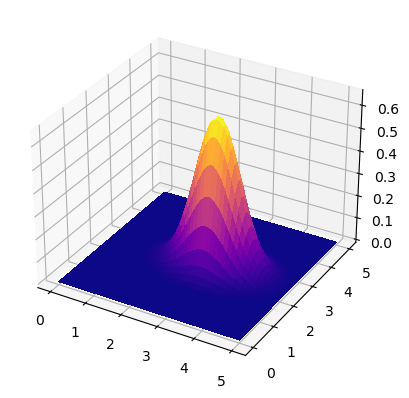

Mx=3 Wx=0.6 My=2.5 Wy=0.4 


Mx=3 Wx=0.6 My=2.5 Wy=0.6 


Mx=3 Wx=0.6 My=2.5 Wy=0.8 


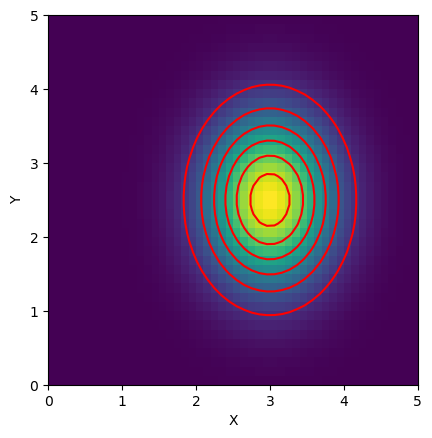

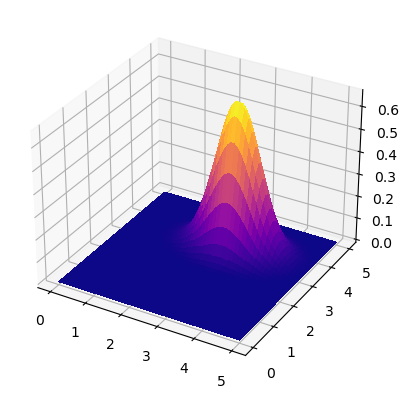

Mx=3 Wx=0.6 My=3.5 Wy=0.4 


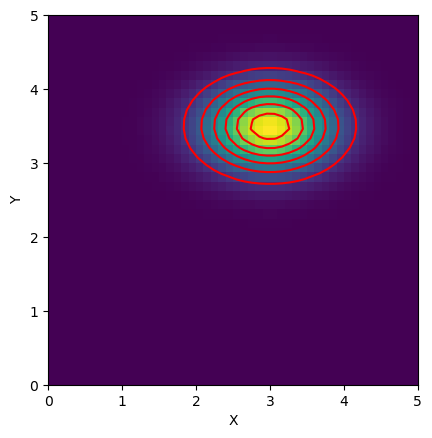

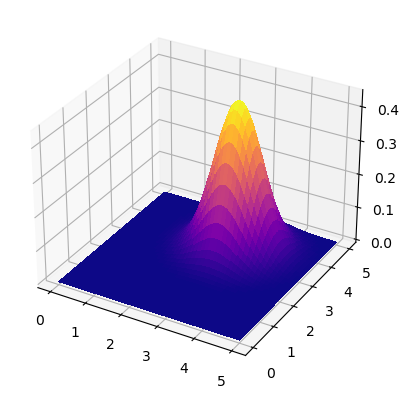

Mx=3 Wx=0.6 My=3.5 Wy=0.6 


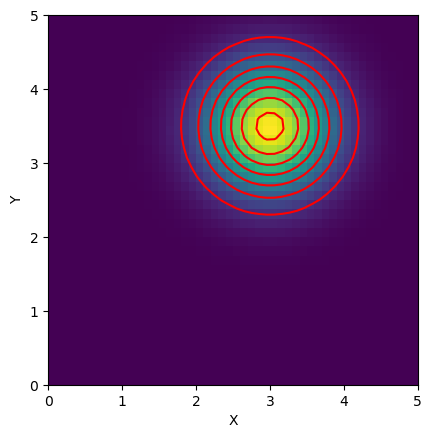

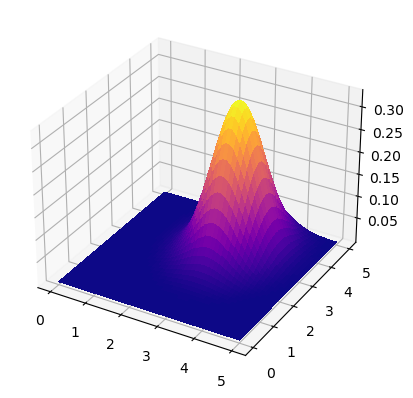

Mx=3 Wx=0.6 My=3.5 Wy=0.8 


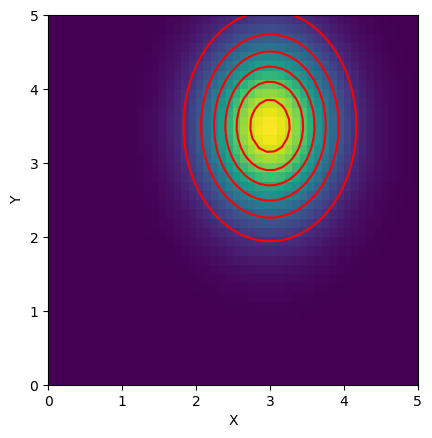

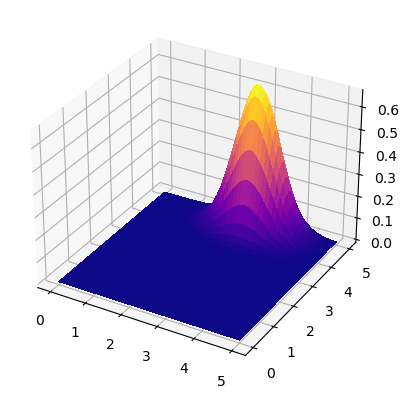

Mx=3 Wx=0.6 My=4.5 Wy=0.4 


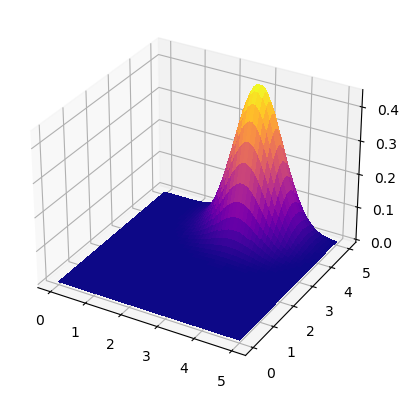

Mx=3 Wx=0.6 My=4.5 Wy=0.6 


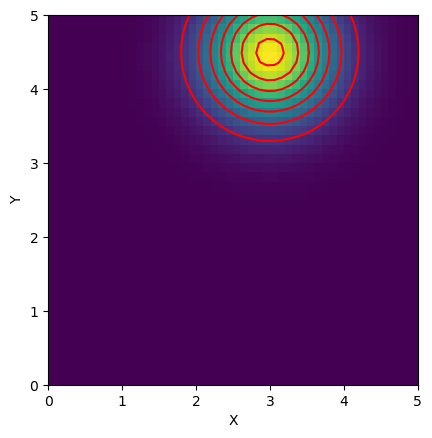

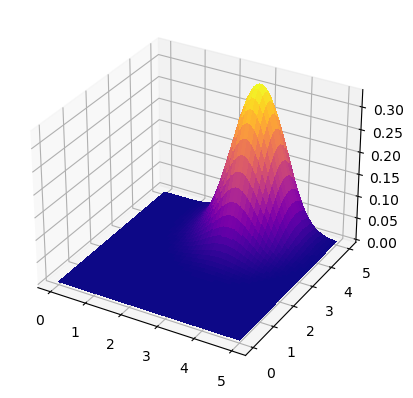

Mx=3 Wx=0.6 My=4.5 Wy=0.8 


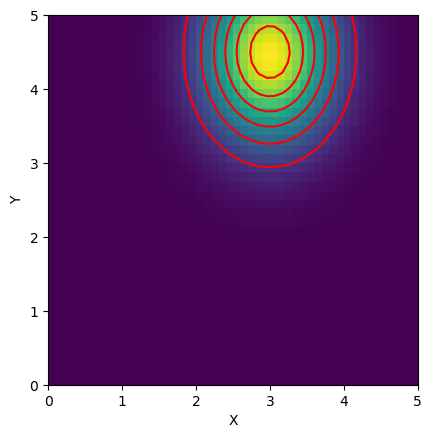

Mx=3 Wx=0.8 My=2.5 Wy=0.4 


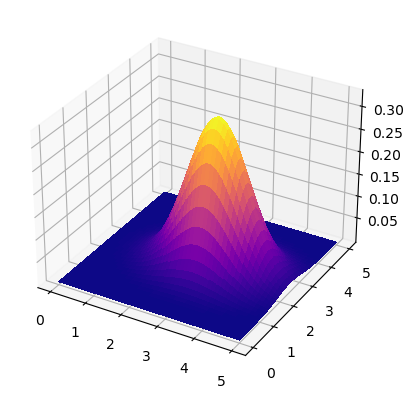

Mx=3 Wx=0.8 My=2.5 Wy=0.6 


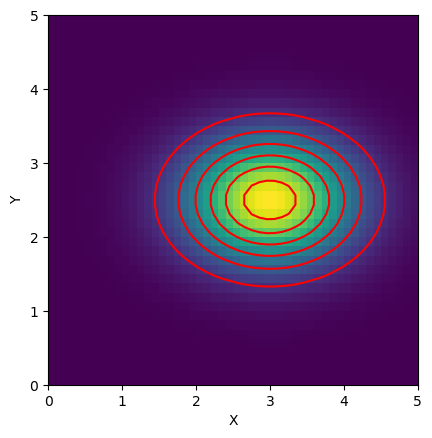

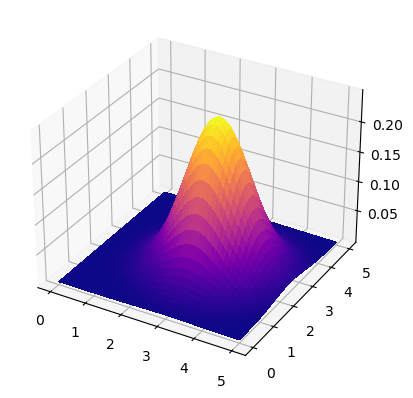

Mx=3 Wx=0.8 My=2.5 Wy=0.8 


Mx=3 Wx=0.8 My=3.5 Wy=0.4 


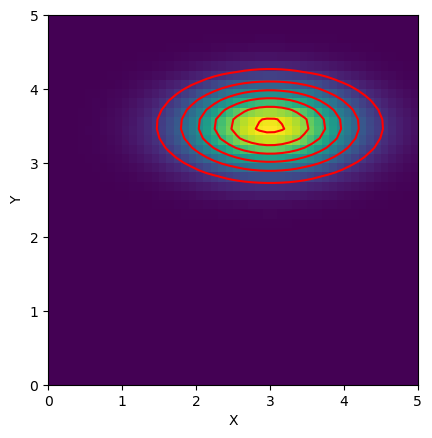

Mx=3 Wx=0.8 My=3.5 Wy=0.6 


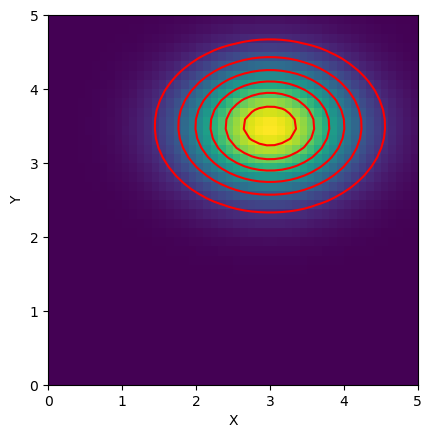

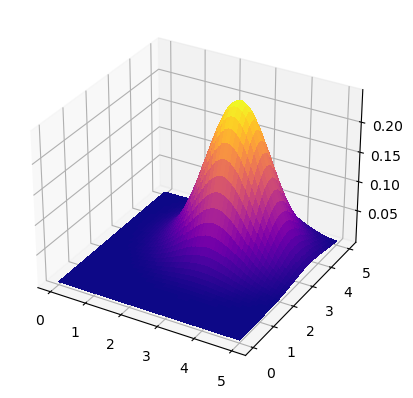

Mx=3 Wx=0.8 My=3.5 Wy=0.8 


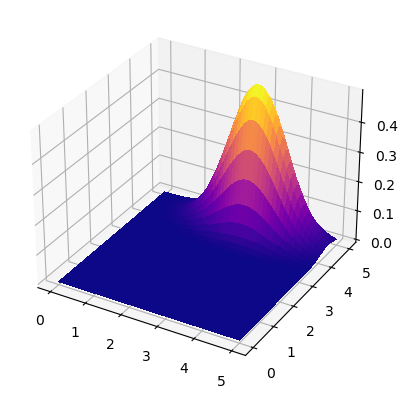

Mx=3 Wx=0.8 My=4.5 Wy=0.4 


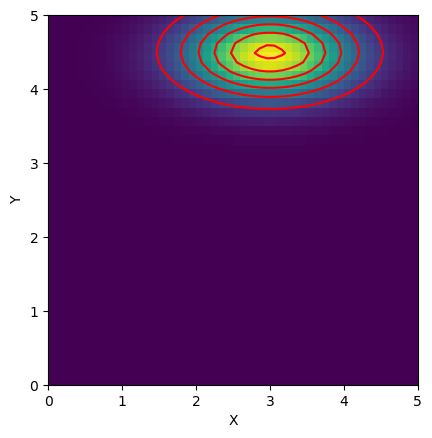

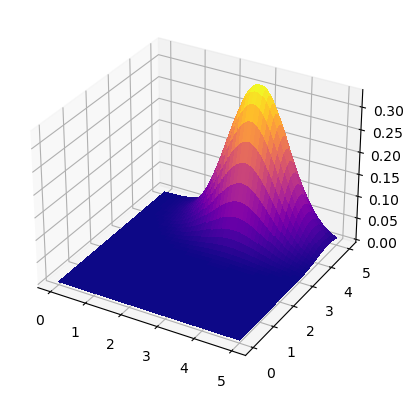

Mx=3 Wx=0.8 My=4.5 Wy=0.6 


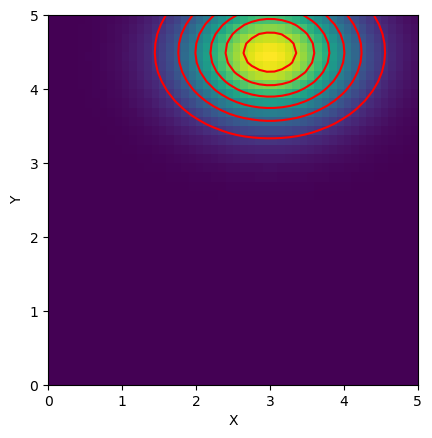

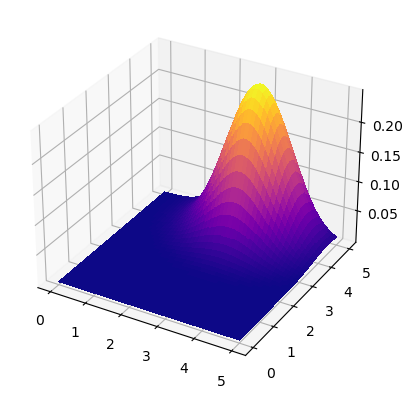

Mx=3 Wx=0.8 My=4.5 Wy=0.8 


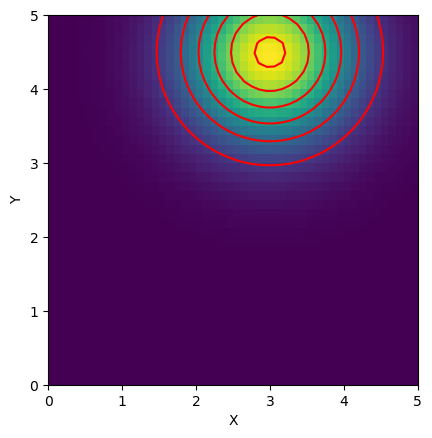

In [26]:
# Changing values of Mx,Wx,My and Wy
print("Surface plot")
x1 = np.linspace(0, 5, 50)
y1 = np.linspace(0, 5, 40)
X1, Y1 = np.meshgrid(x1, y1)

mx1 = [1,2,3]
my1 = [2.5,3.5,4.5]
wx1=[0.4, 0.6, 0.8]
wy1= [0.4, 0.6, 0.8]
print(f"Surface and contour and image with different parameter values")
for i in mx1:
    for j in wx1:
        for k in my1:
            for l in wy1:
                fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
                surf = ax.plot_surface(X1, Y1, gaussian2d(X1,i,j,Y1,k,l), cmap="plasma", linewidth=3, antialiased=False)
                plt.show()
                plt.contour(X1, Y1, gaussian2d(X1,i,j,Y1,k,l), colors='red')
                plt.imshow(gaussian2d(X1,i,j,Y1,k,l), extent=[0, 5,0, 5], origin='lower', cmap='viridis');
                print(f"Mx={i} Wx={j} My={k} Wy={l} ")
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.show()
        



____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information?

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

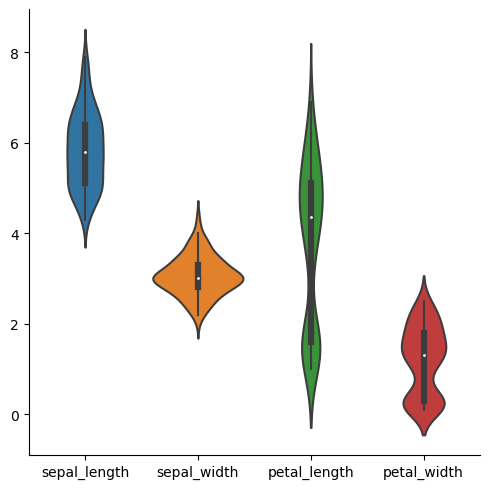

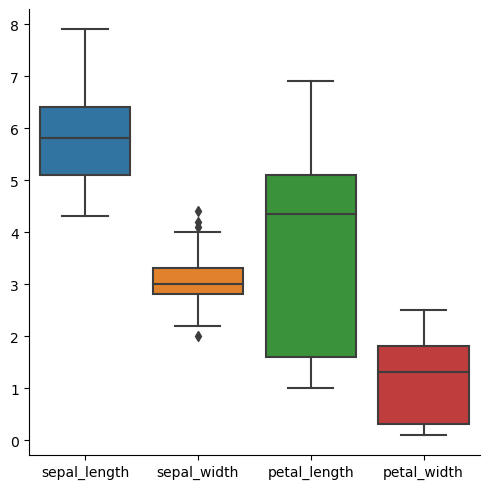

In [27]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

# Ans 
 👉 Top plot is a violin plot. And the bottom onw is box plot.
 From those plots, We can see the distribution of different things. 
 The "iris" dataset's violin plot offers a visual depiction of probability density across various values. It displays wider       segments to represent denser areas and narrower segments to represent denser areas, allowing a thorough analysis of         distribution symmetry and the potential for numerous modes. In contrast, the box plot emphasizes the identification of outliers and provides a brief description of central tendency and dispersion while communicating summary statistics like the median and interquartile range.
In conclusion, the violin plot, when compared to the box plot, provides a more in-depth understanding of the distribution of the data.
 Sepal length starts at around 4 then it rises, it is highest at around 6,then it falls and ends at around 8.
 Sepal width is closest to normal distribution and has some outliers.
 Petal length has 2 peaks for density function and more wide spread than petal width.
 Petal width also has 2 peaks for density function and more less spread than petal length.
 

Ans
👉  Now I am building box and violin plot from my stroke dataset.


In [28]:
import pandas as pd
my_df=pd.read_csv("stroke.csv")
my_df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

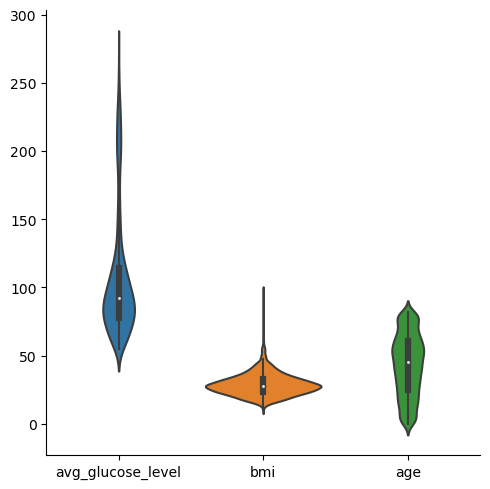

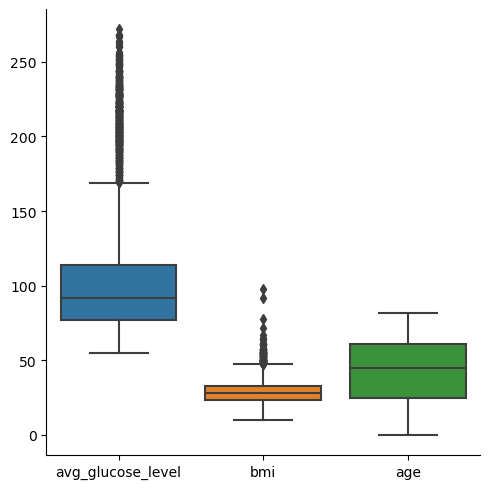

In [29]:
red_mydf=my_df[['avg_glucose_level','bmi','age']]
sns.catplot(data=red_mydf, kind="violin")
sns.catplot(data=red_mydf, kind="box")

# Ans 
 👉 From violin plot of my dataset, I can see the distributions of average glucose level, bmi and age. I can see how those are distributed and I can also see outliers.